# İMPORT LİBRARİES

Layihədə istifadə olunacaq Python kitabxanaları yüklənir.

Məsələn: pandas, numpy, matplotlib, seaborn, scikit-learn və s.

Bu mərhələ kodun işləməsi üçün əsasdır.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler ,  MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib
from imblearn.under_sampling import RandomUnderSampler

# UPLOAD DATA

Dataset yüklənir (CSV, Excel, SQL, API və ya digər mənbələrdən).

Fayl yolundan və ya serverdən məlumatlar alınır.

İlk baxış üçün məlumatın qısa hissəsi göstərilə bilər (head(), tail()).

Data set link - Kaggle
https://www.kaggle.com/datasets/ayushkumarnamdeo/dataset-for-bank-loan-fraud-detection-system

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/account_data.csv")

İlk 5 sətir

In [ ]:
df.head()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


son 5 sətir

In [ ]:
df.tail()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
9995,53,Doctor,Divorced,0,Own,134,749,109835,2000,24,...,Normal,On-time,No,Verified,No,Desktop,No,Consistent,Referral,No
9996,56,Self-employed,Single,1,Own,1,749,65018,66029,5,...,Normal,Late,No,Verified,No,Desktop,No,Consistent,Referral,No
9997,22,Student,Single,0,Rent,85,811,0,2000,1,...,Normal,Defaulted,Yes,Not Verified,No,Mobile,No,Inconsistent,Online,Yes
9998,40,Self-employed,Single,0,Rent,1,757,6907,7352,12,...,Normal,Defaulted,No,Not Verified,No,Mobile,Yes,Inconsistent,Online,Yes
9999,56,Manager,Divorced,1,Own,1,807,62989,300000,27,...,Normal,Late,No,Verified,No,Desktop,No,Consistent,Referral,No


Burada ilk öncə datamızın target sütununun balanslı olub olmamasını yoxlayırıq.

In [ ]:
import plotly.express as px
labels=["Genuine","Fraud"]

fraud_or_not = df["IsFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['IsFraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

# GETTING TO KNOW DATA (Data Understanding)

Datasetin ümumi quruluşu öyrənilir: neçə satır/sütun var (shape).

Sütunların adları, tipləri (dtypes), və qısa təsviri (info(), describe()) götürülür.

Kategorik və sayısal dəyişənlər ayrılır.

Məlumatda ola biləcək boş, unikal, təkrarlanan dəyərlər yoxlanılır.

Sətir və sütün sayı öyrənilir

In [ ]:
rows, columns = df.shape
print(f"Datasetdə {rows} sətir və {columns} sütun var.")

Datasetdə 10000 sətir və 29 sütun var.


Datada olan sütunlar və onların data tipi haqqında məlumat alınır

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

Hər sütun üçün statistik göstəricilər əldə edilir.

In [ ]:
df.describe()

,Age,Dependents,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,InterestRate,PreviousLoans,ExistingLiabilities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.837900,1.323400,69.087400,768.701300,45994.615600,57218.915600,13.847700,5.149970,1.656900,3046.742500
std,12.631048,1.506399,84.854114,74.280933,44648.184654,72897.716564,10.923508,0.973665,1.172996,2091.148502
min,22.000000,0.000000,1.000000,580.000000,0.000000,2000.000000,1.000000,4.500000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,721.000000,8277.500000,10555.000000,2.000000,4.500000,1.000000,1222.000000
50%,31.000000,1.000000,50.000000,801.000000,32791.000000,44008.500000,13.000000,4.500000,1.000000,3231.000000
75%,45.000000,2.000000,86.000000,830.000000,71698.000000,68073.750000,24.000000,5.600000,2.000000,4545.250000
max,56.000000,4.000000,360.000000,830.000000,150000.000000,300000.000000,30.000000,8.000000,4.000000,7000.000000


Datasetdə mövcud olan sütun adları list halında göstərilir.

In [ ]:
print(df.columns.tolist())

['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus', 'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested', 'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate', 'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']


Datasetdəki sütunların tipləri öyrənilir.

In [ ]:
df.dtypes

,0
Age,int64
Occupation,object
MaritalStatus,object
Dependents,int64
ResidentialStatus,object
AddressDuration,int64
CreditScore,int64
IncomeLevel,int64
LoanAmountRequested,int64
LoanTerm,int64


Categorical və object tipli sütunlar və Numeric sütunlar list halında ayrı ayrılıqda göstərilir.

In [ ]:
# Categorical və Numeric dəyişənləri ayır
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Əgər hədəf dəyişən (Is_Fraud) içərisindədirsə, çıxart
if 'is_fraudulent' in categorical_columns:
    categorical_columns.remove('is_fraudulent')
if 'is_fraudulent' in numerical_columns:
    numerical_columns.remove('is_fraudulent')

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Occupation', 'MaritalStatus', 'ResidentialStatus', 'PurposeoftheLoan', 'Collateral', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']
Numerical Columns: ['Age', 'Dependents', 'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested', 'LoanTerm', 'InterestRate', 'PreviousLoans', 'ExistingLiabilities']


Null dəyərlər mövcudluğu yoxlanılır.

In [ ]:
df.isnull().sum()

,0
Age,0
Occupation,0
MaritalStatus,0
Dependents,0
ResidentialStatus,0
AddressDuration,0
CreditScore,0
IncomeLevel,0
LoanAmountRequested,0
LoanTerm,0


Nan dəyərlətin mövcudluğu yoxlanılır.

In [ ]:
df.isna().sum()

,0
Age,0
Occupation,0
MaritalStatus,0
Dependents,0
ResidentialStatus,0
AddressDuration,0
CreditScore,0
IncomeLevel,0
LoanAmountRequested,0
LoanTerm,0


Boş dəyərlər,Unikal dəyərlərin hər sütun üçün sayı, Dublikat sətrlər yoxlanılır.

In [ ]:
# 1. Boş dəyərlərin yoxlanması
print("Boş dəyərlərin sayı:")
print(df.isnull().sum())
print("\nBoş dəyər olan sütunlar:")
print(df.columns[df.isnull().any()].tolist())

# 2. Unikal dəyərlərin sayı
print("\nHər sütundakı unikal dəyərlərin sayı:")
print(df.nunique())

# 3. Tamamilə unikal sütunlar (məsələn, ID tipləri)
print("\nTamamilə unikal olan sütunlar:")
print([col for col in df.columns if df[col].nunique() == df.shape[0]])

# 4. Dublikat sətrlərin (rows) yoxlanması
duplicate_rows = df.duplicated()
print(f"\nTəkrarlanan sətrlərin sayı: {duplicate_rows.sum()}")

Boş dəyərlərin sayı:
Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

Boş dəyər olan sütunlar:
[]

Hər sütundakı unikal dəyərlərin sayı:

# EXPLORATORY DATA ANALYSIS (EDA)

Verilənlər vizual analiz olunur.

Statistik xülasələr alınır.

Paylama analizləri (histogramlar, boxplotlar, scatterplotlar və s.) edilir.

Dəyişənlər arasındakı əlaqələr (korrelyasiya) araşdırılır.

Məqsəd: məlumatın daxili strukturu, anomaliyalar, və nümunələr kəşf etmək.

Hər sütun üçün statistik göstəricilər əldə edilir.

In [ ]:
df.describe()

,Age,Dependents,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,InterestRate,PreviousLoans,ExistingLiabilities
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.837900,1.323400,69.087400,768.701300,45994.615600,57218.915600,13.847700,5.149970,1.656900,3046.742500
std,12.631048,1.506399,84.854114,74.280933,44648.184654,72897.716564,10.923508,0.973665,1.172996,2091.148502
min,22.000000,0.000000,1.000000,580.000000,0.000000,2000.000000,1.000000,4.500000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,721.000000,8277.500000,10555.000000,2.000000,4.500000,1.000000,1222.000000
50%,31.000000,1.000000,50.000000,801.000000,32791.000000,44008.500000,13.000000,4.500000,1.000000,3231.000000
75%,45.000000,2.000000,86.000000,830.000000,71698.000000,68073.750000,24.000000,5.600000,2.000000,4545.250000
max,56.000000,4.000000,360.000000,830.000000,150000.000000,300000.000000,30.000000,8.000000,4.000000,7000.000000


Target sütunu Yes,No olduğu üçün 0 və 1 kimi encoding edilir.

In [ ]:
# "Yes" → 1, "No" → 0 şəklində encoding
df["IsFraud"] = df["IsFraud"].map({"No": 0, "Yes": 1})


Categorical sütunlar ilə target(İsFraud) sütunu arasında əlaqə vizuallaşdırma ilə göstərilir

Belə vizuallar bizə:

Əsas fırıldaqçılıq mənbələrini görməyə imkan verir

Model üçün faydalı feature-ları seçməyə kömək edir

Datalardakı disbalansları və ya qəribəlikləri aşkar etməyə kömək edir

Analyzing: Occupation


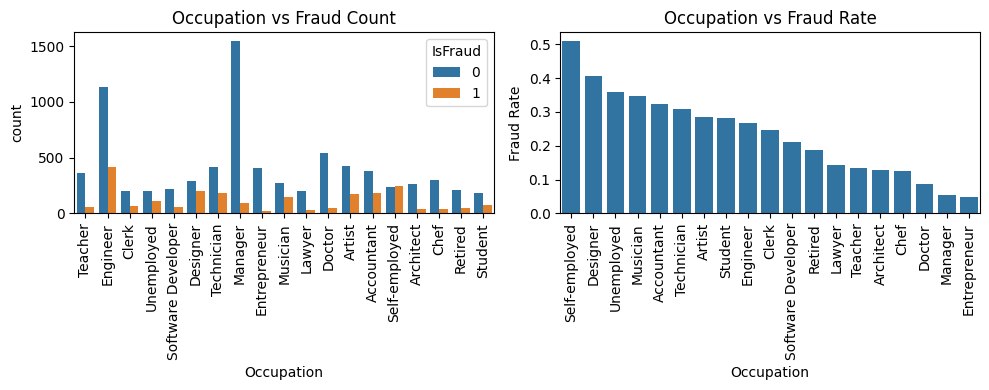

Analyzing: MaritalStatus


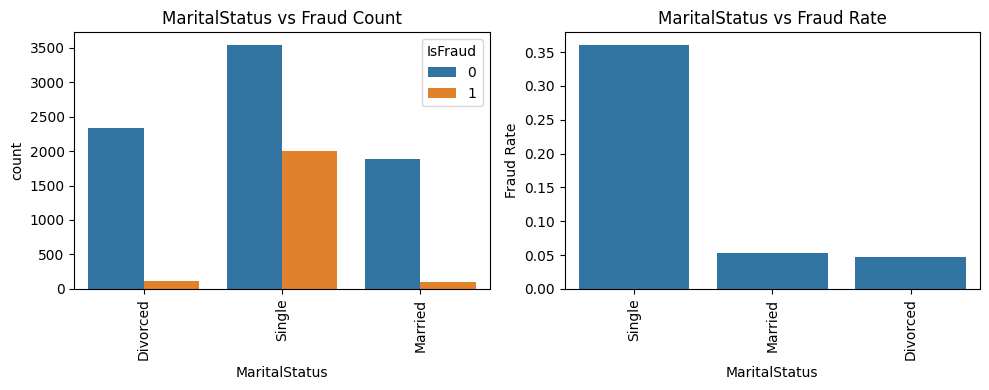

Analyzing: ResidentialStatus


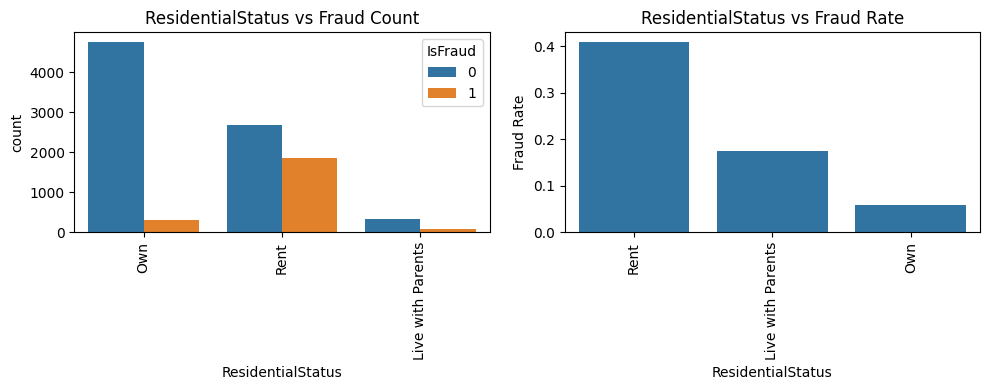

Analyzing: PurposeoftheLoan


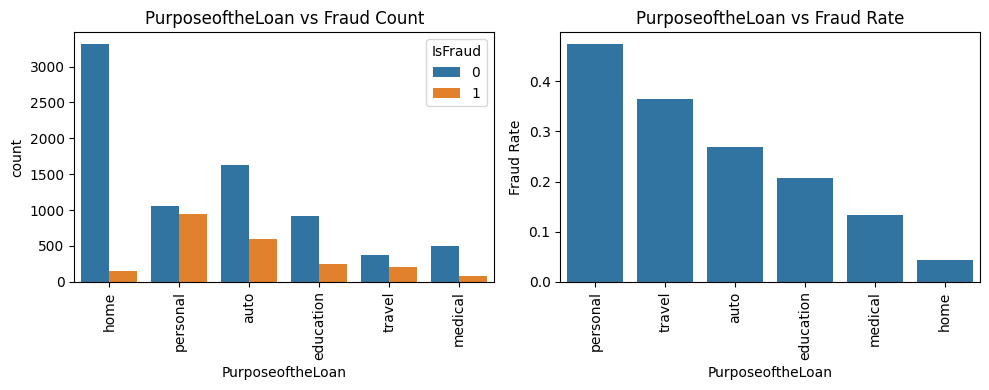

Analyzing: Collateral


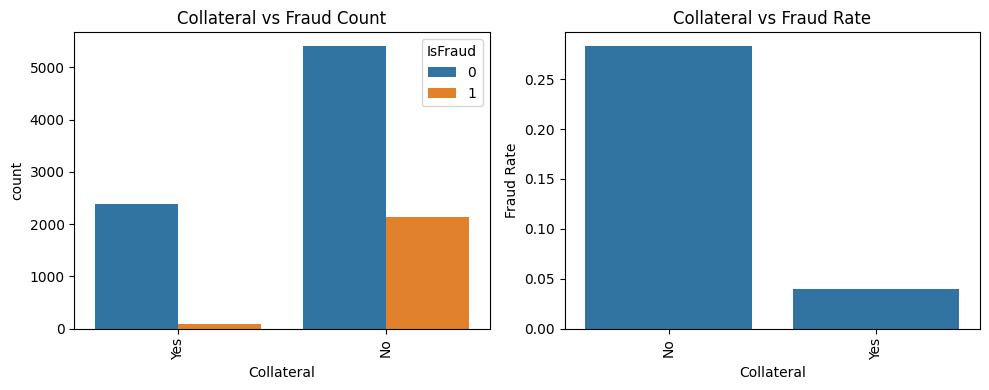

Analyzing: ApplicationBehavior


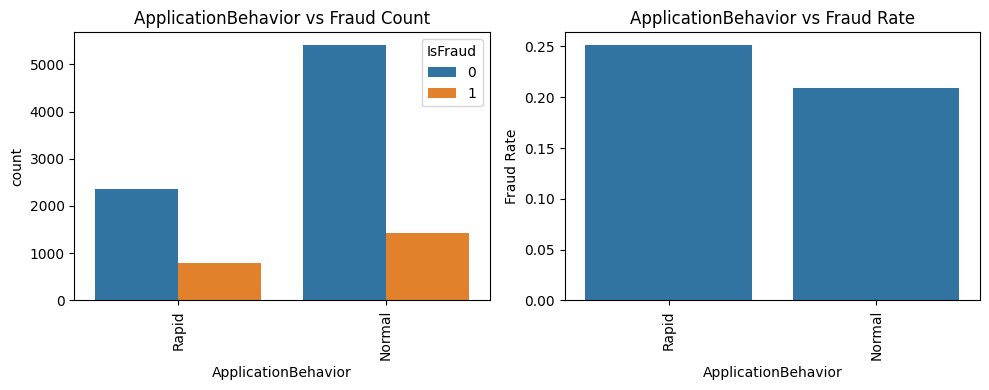

Analyzing: LocationofApplication


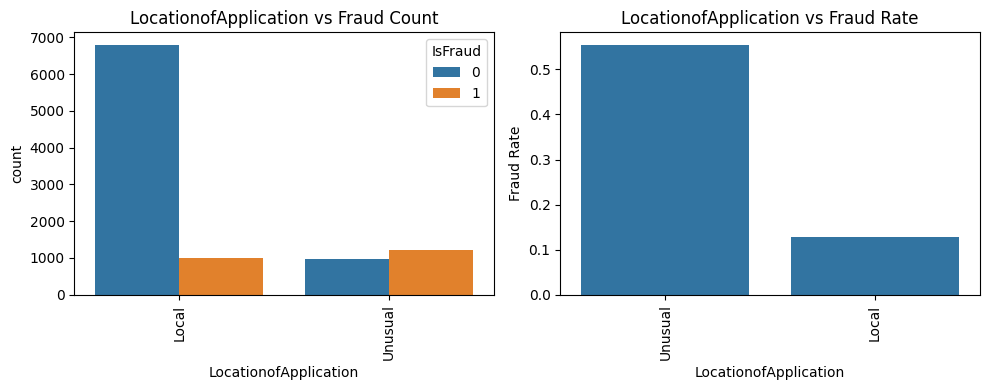

Analyzing: ChangeinBehavior


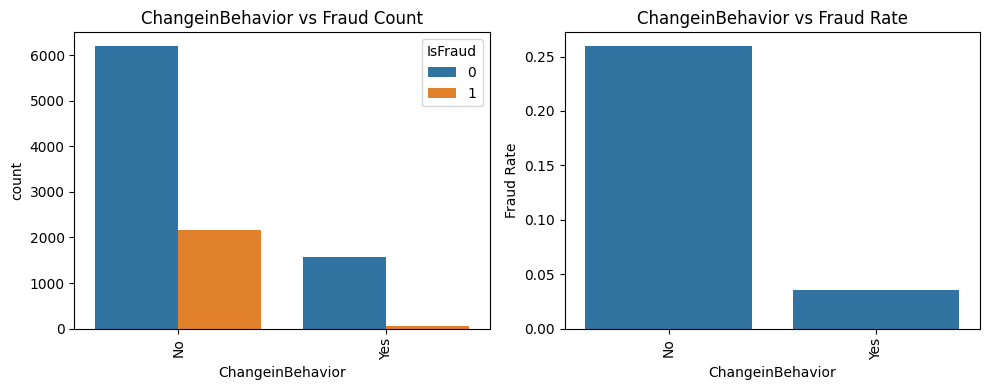

Analyzing: TimeofTransaction


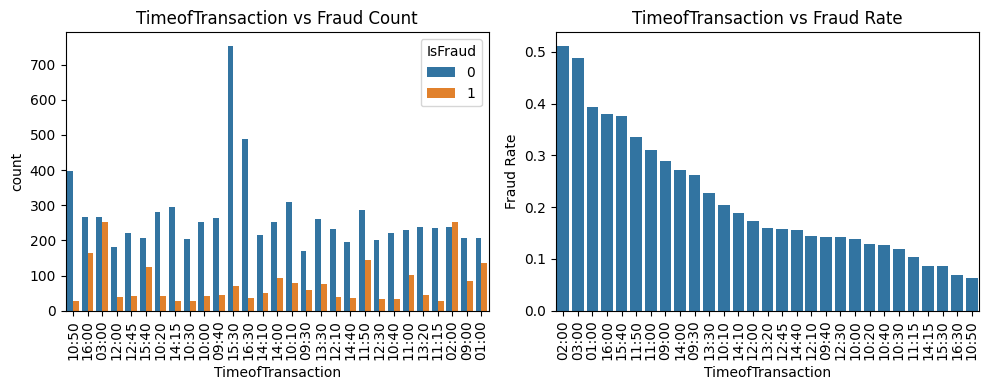

Analyzing: AccountActivity


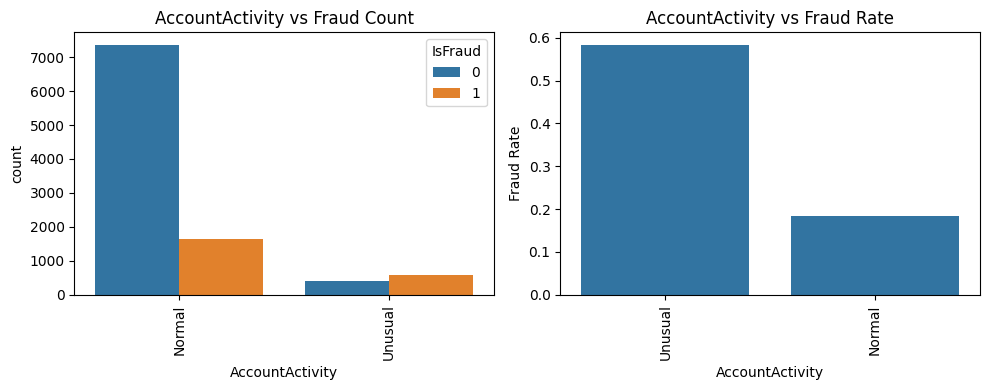

Analyzing: PaymentBehavior


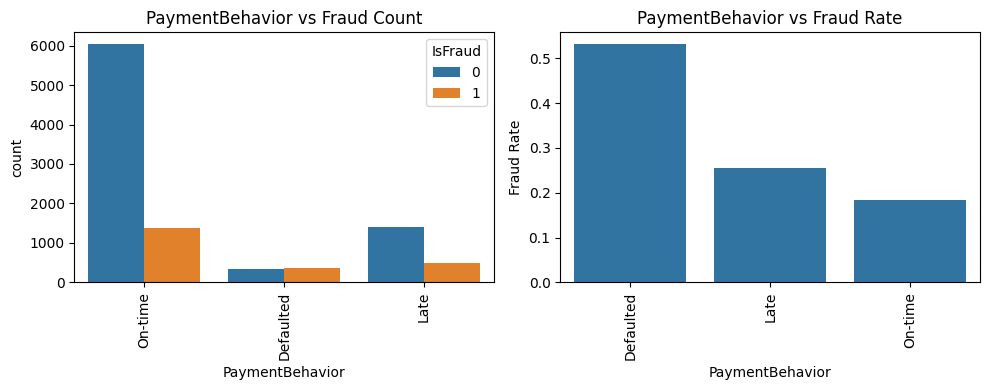

Analyzing: Blacklists


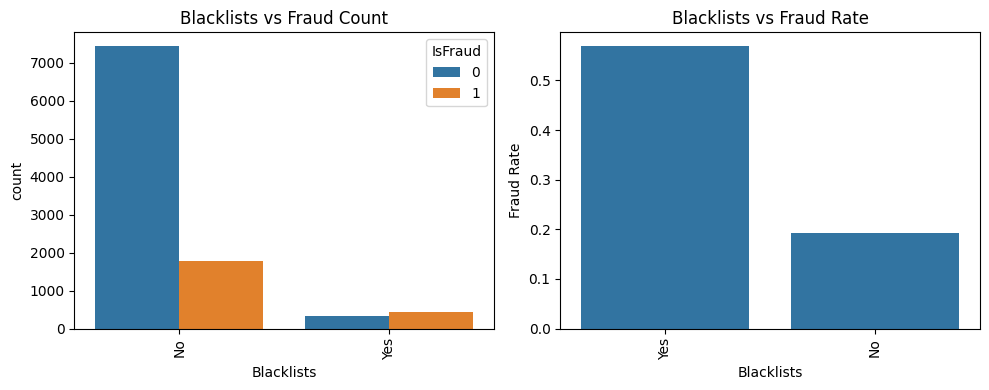

Analyzing: EmploymentVerification


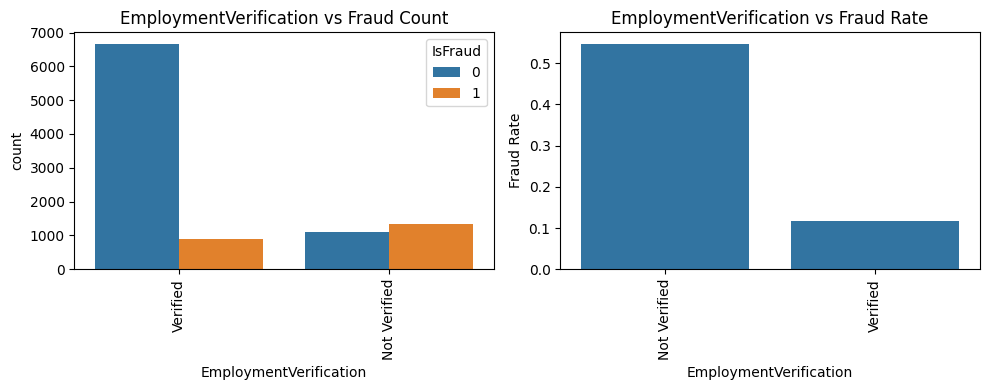

Analyzing: PastFinancialMalpractices


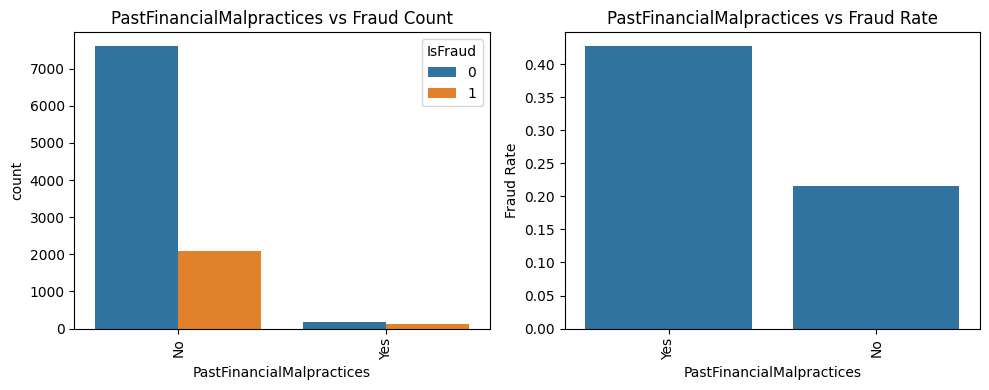

Analyzing: DeviceInformation


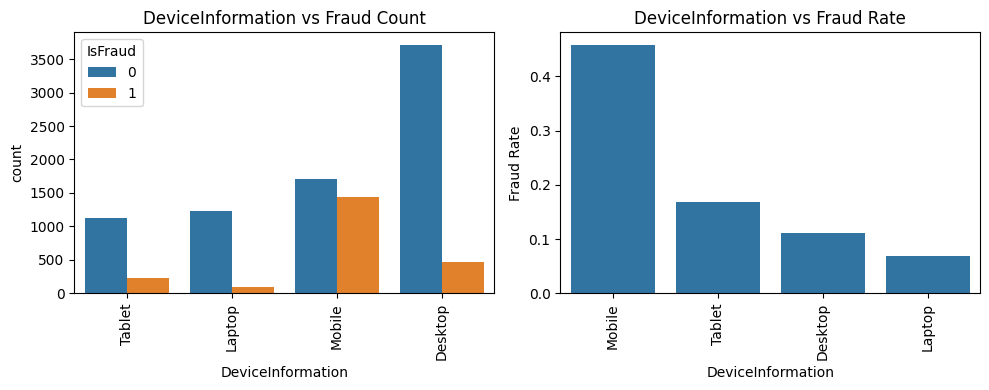

Analyzing: SocialMediaFootprint


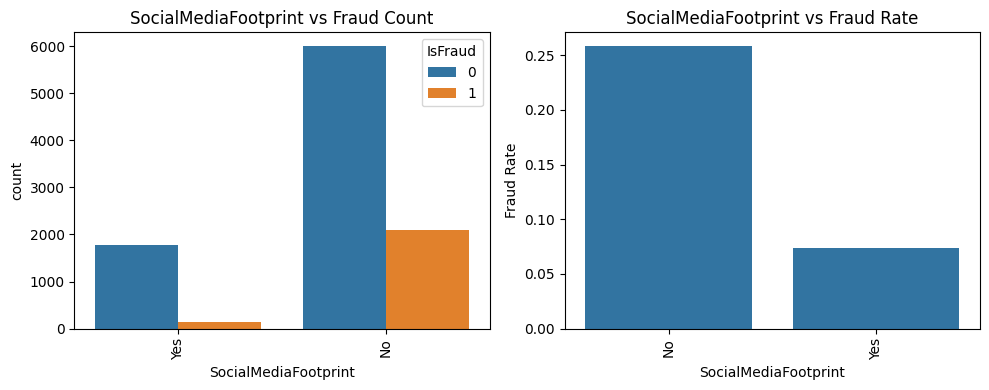

Analyzing: ConsistencyinData


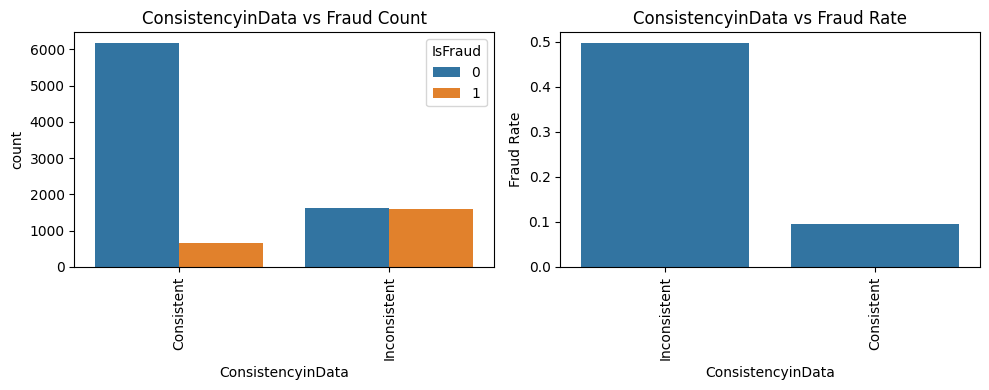

Analyzing: Referral


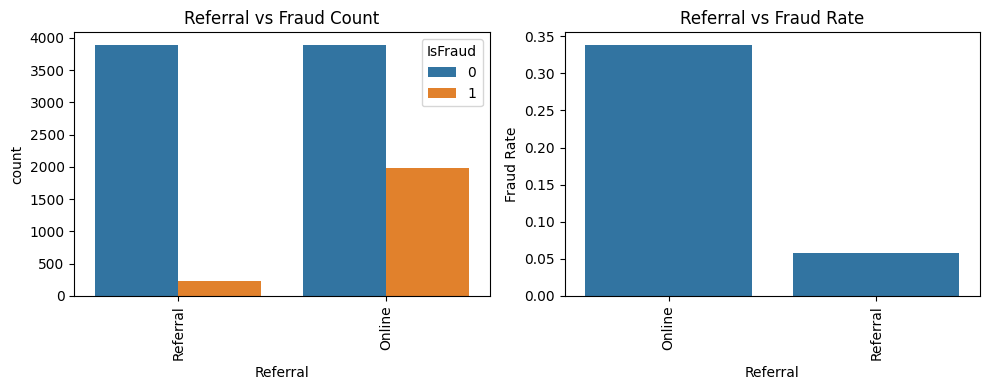

Analyzing: IsFraud


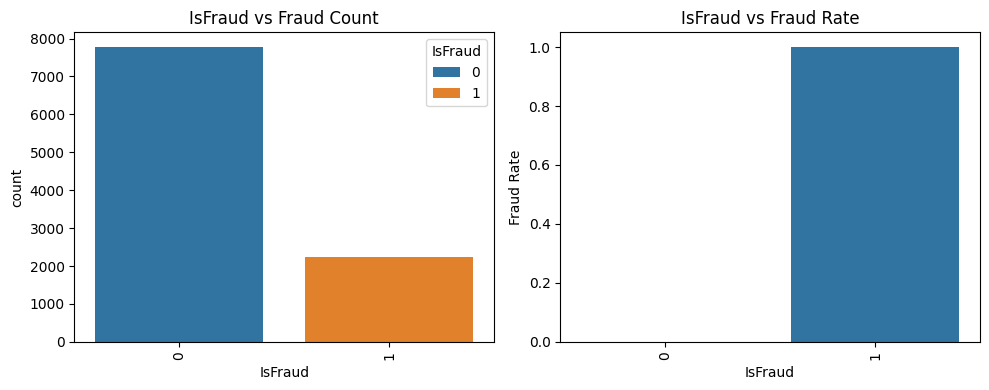

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Occupation', 'MaritalStatus', 'ResidentialStatus', 'PurposeoftheLoan', 'Collateral', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']


# Mövcud olmayan sütunlar varsa atmaq üçün
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Funksiya: countplot və fraud nisbət barplot
def plot_fraud_relation(df, col):
    plt.figure(figsize=(10, 4))
    # Countplot (say üzrə)
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, hue='IsFraud')
    plt.xticks(rotation=90)
    plt.title(f'{col} vs Fraud Count')

    # Fraud rate barplot
    plt.subplot(1, 2, 2)
    fraud_rate = df.groupby(col)['IsFraud'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs Fraud Rate')
    plt.ylabel("Fraud Rate")

    plt.tight_layout()
    plt.show()

# Bütün kateqorik dəyişənlər üçün tətbiq et
for col in categorical_cols:
    print(f"Analyzing: {col}")
    if df[col].nunique() <= 50:  # 50-dən çox unikal dəyəri olanları keçmək üçün
        plot_fraud_relation(df, col)
    else:
        print(f"Skipped '{col}' due to high cardinality ({df[col].nunique()} unique values)\n")


Sayısal Dəyişənlərin Histogramları

Fayda	                           Təsviri
📈 Dağılımı anlamaq	             Məlumat normaldırmı, yoxsa pozulub?
🚨 Aykırı dəyərləri görmək	     Fırıldaqçılıq və ya səhv daxil edilmiş dəyərləri tapmaq
🔧 Feature transformation planlamaq	Log dönüştürmə, normalizasiya, standardization
🔍 Data cleaning qərarları	     Null dəyərlərdən əvvəl veriləri anlamaq

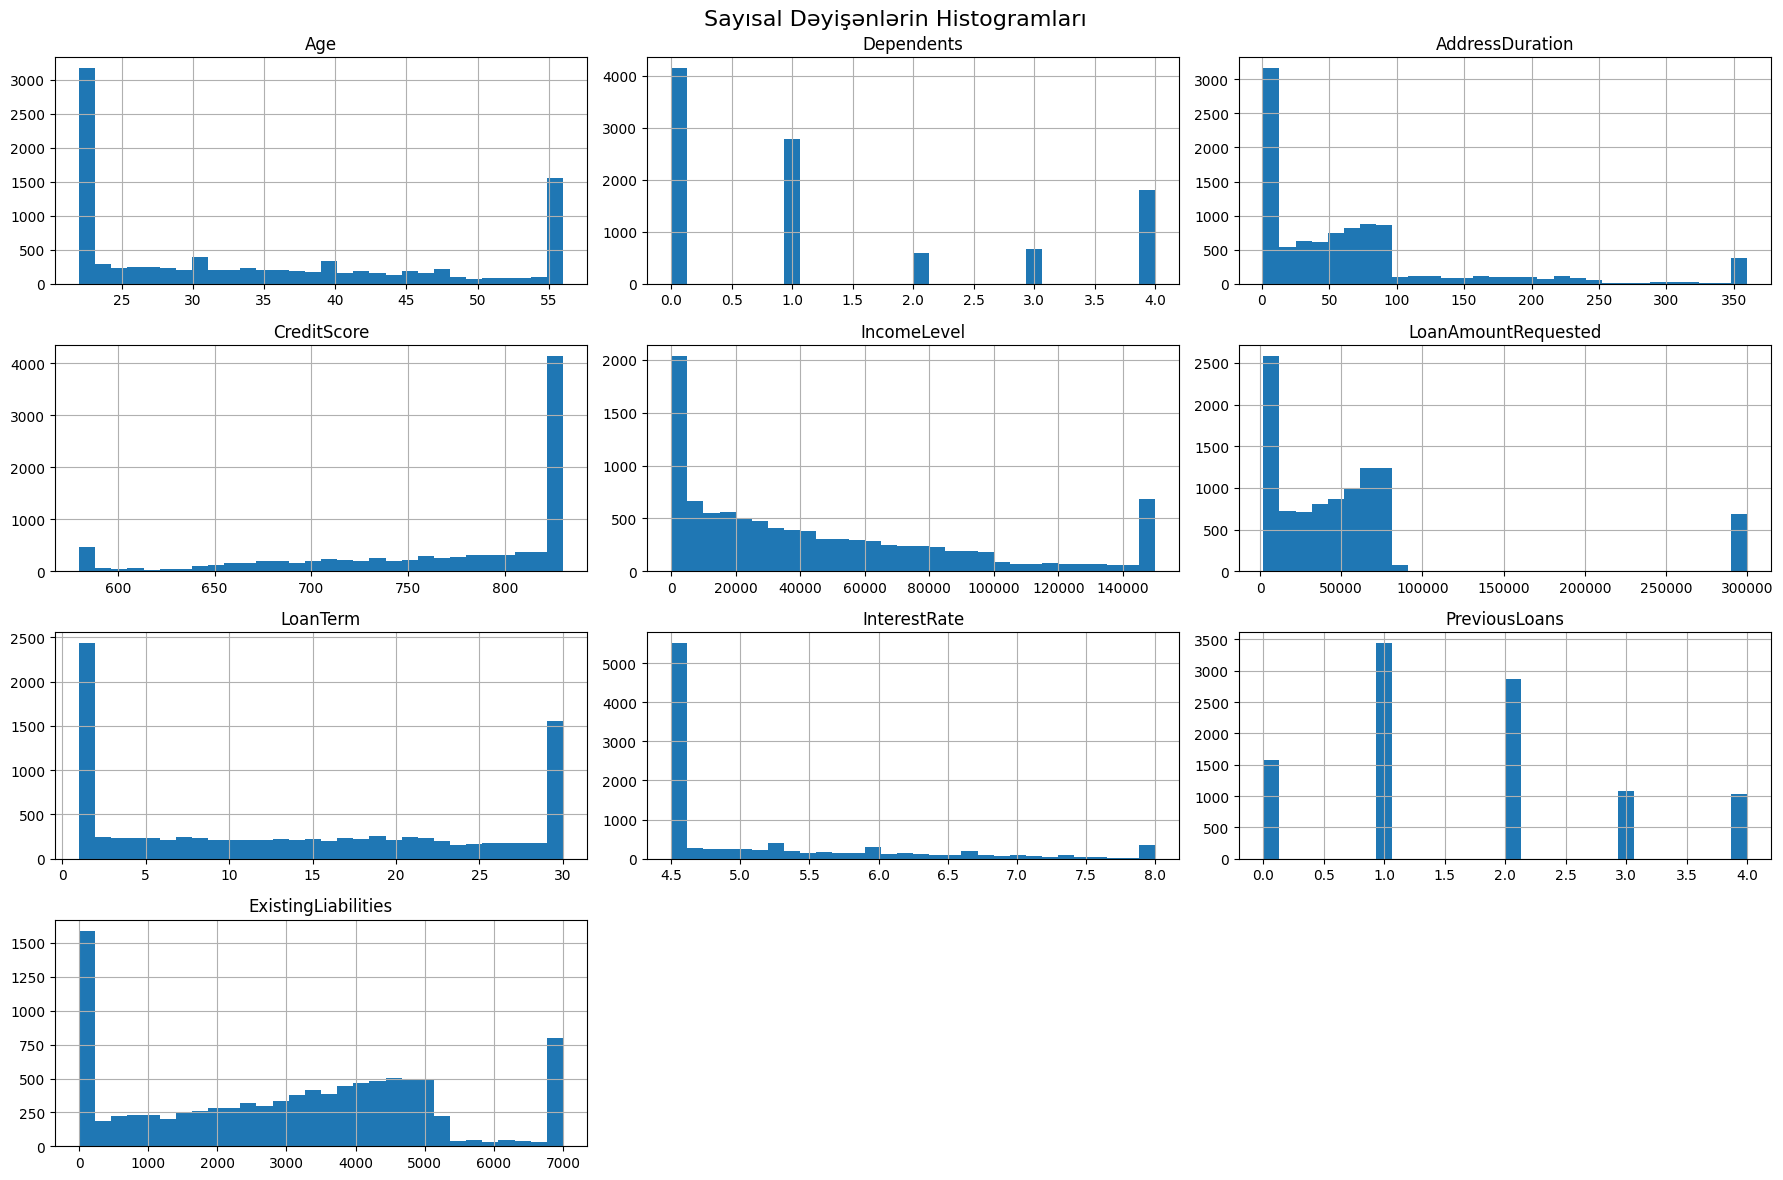

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunları seç
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'IsFraud' in numerical_columns:
    numerical_columns.remove('IsFraud')

# Histograms
df[numerical_columns].hist(bins=30, figsize=(18, 12), layout=(int(len(numerical_columns)/3)+1, 3))
plt.suptitle("Sayısal Dəyişənlərin Histogramları", fontsize=16)
plt.tight_layout()
plt.show()

Numeric sütunlar ilə boxplot (fraud statusuna görə)

Sual	Boxplot ilə cavabı
Fırıldaqçılıqda məbləğlər fərqlidirmi?	Bəli → Boxplotdan görürük
Outlier-lar hansılardır?	Kənarda olan nöqtələr
Dağılım simmetrikdirmi?	Qutunun mərkəzi və quyruqlarına baxılır
Hər iki sinifdə (IsFraud=0/1) fərq varmı?	Qutuların yeri və uzunluğu müqayisə edilir

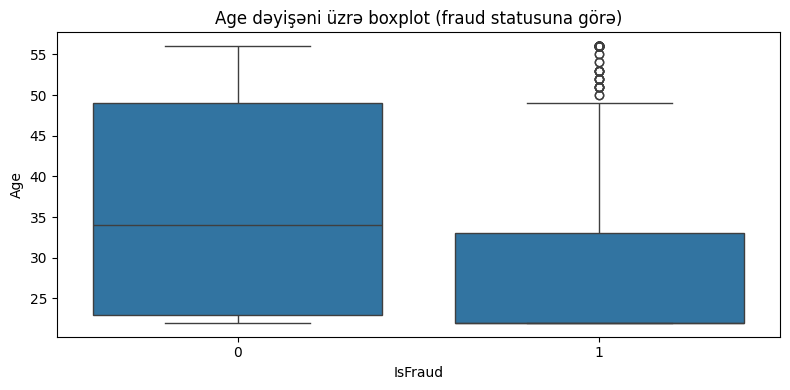

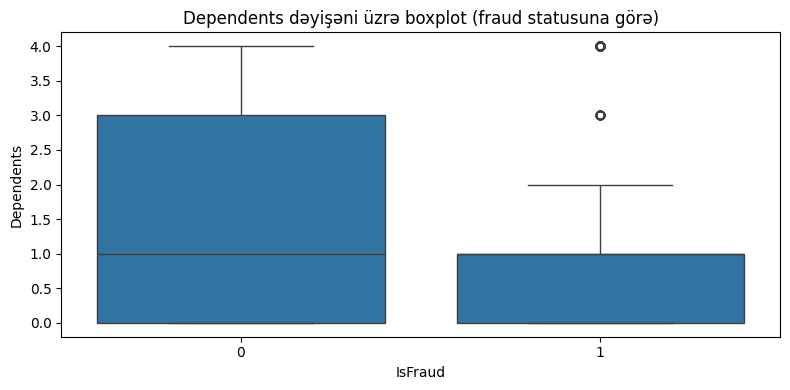

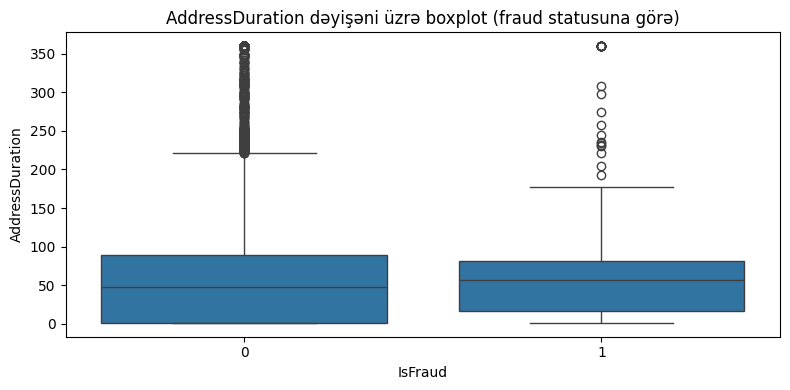

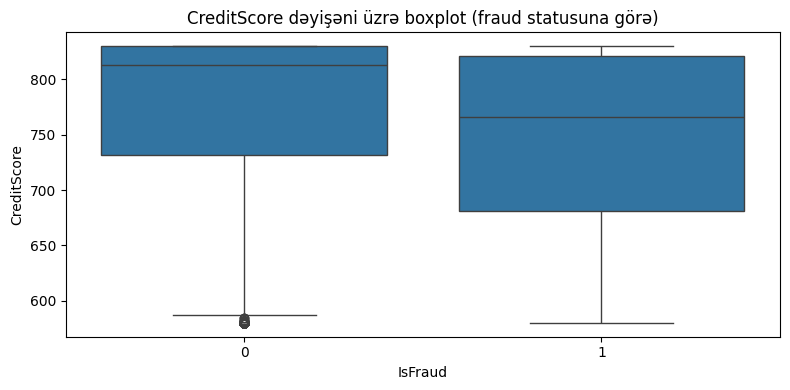

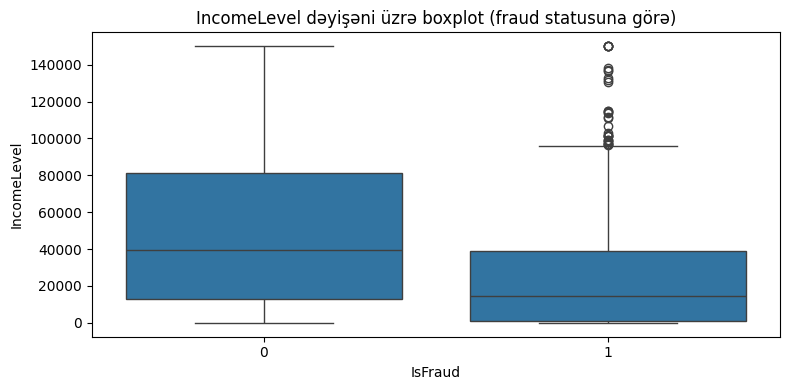

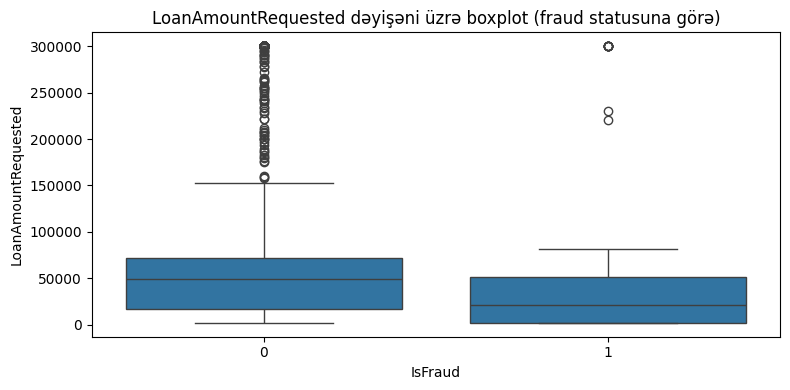

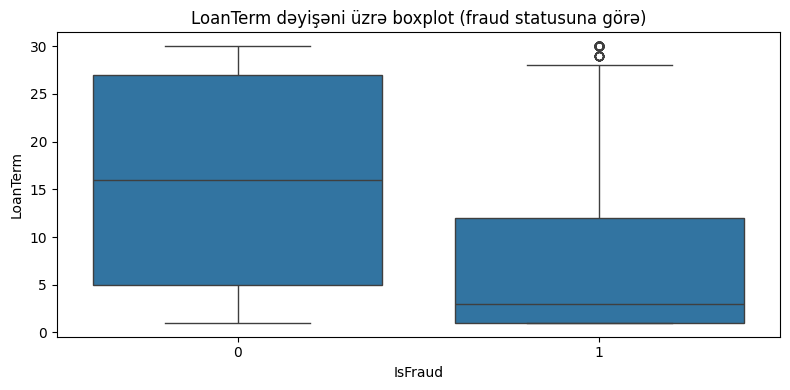

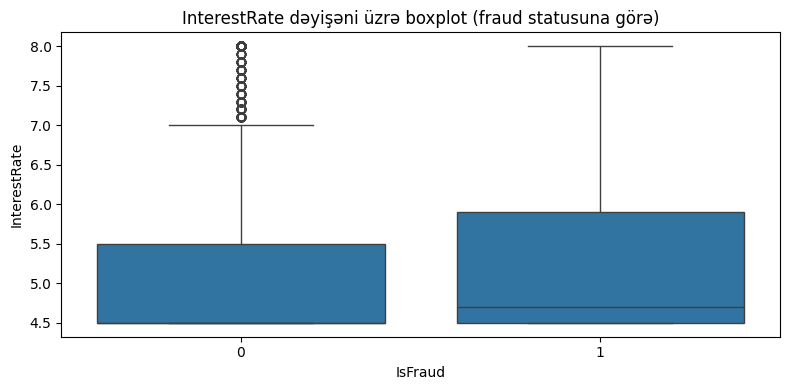

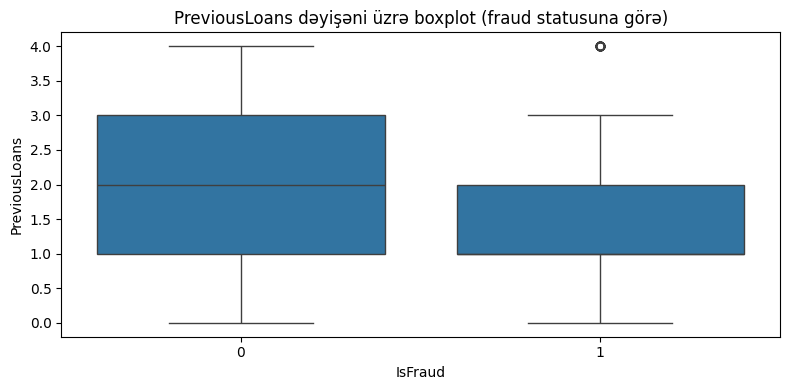

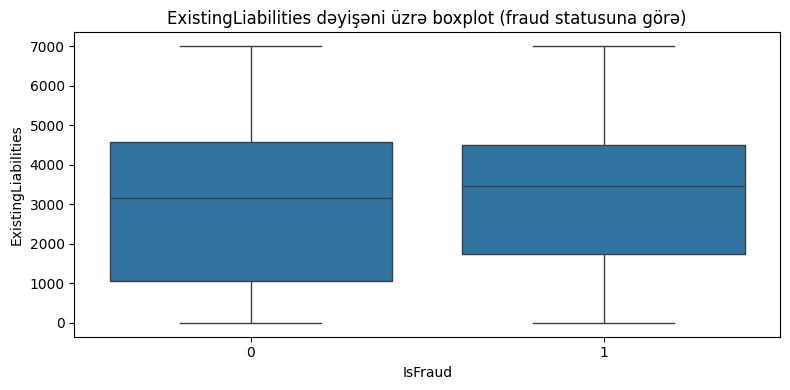

In [ ]:
# Boxplotlar - hədəf dəyişənə görə (Is_Fraud)
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='IsFraud', y=col, data=df)
    plt.title(f"{col} dəyişəni üzrə boxplot (fraud statusuna görə)")
    plt.tight_layout()
    plt.show()

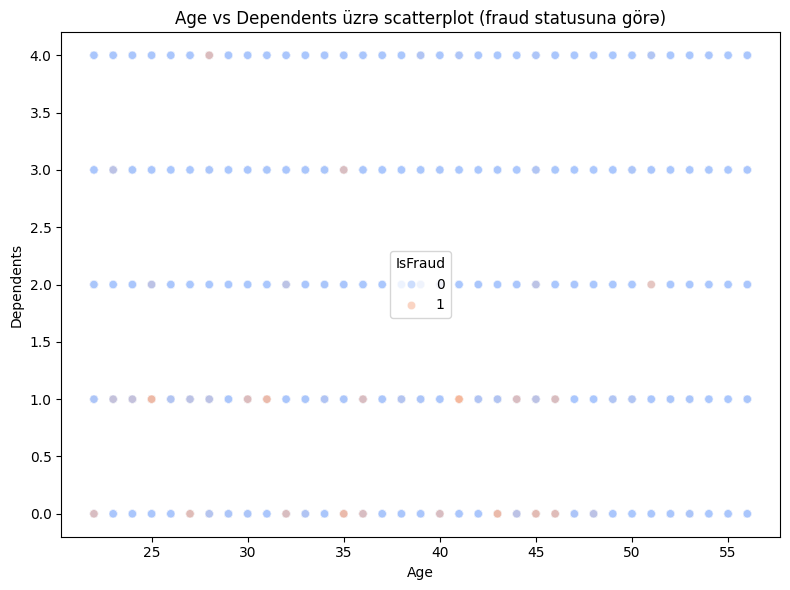

In [ ]:
# İlk iki sayısal dəyişən üçün scatterplot (əgər varsa)
if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=numerical_columns[0], y=numerical_columns[1], hue='IsFraud', palette='coolwarm', alpha=0.6)
    plt.title(f"{numerical_columns[0]} vs {numerical_columns[1]} üzrə scatterplot (fraud statusuna görə)")
    plt.tight_layout()
    plt.show()

Korelyasiya Matriksi (Sayısal Dəyişənlər)

Hədəf dəyişənlə (“Fraud”) güclü korrelyasiyada olan dəyişənlər modelə daxil edilə bilər.

Az və ya sıfıra yaxın korrelyasiya olan dəyişənlər isə bəzən önəmsiz ola bilər.

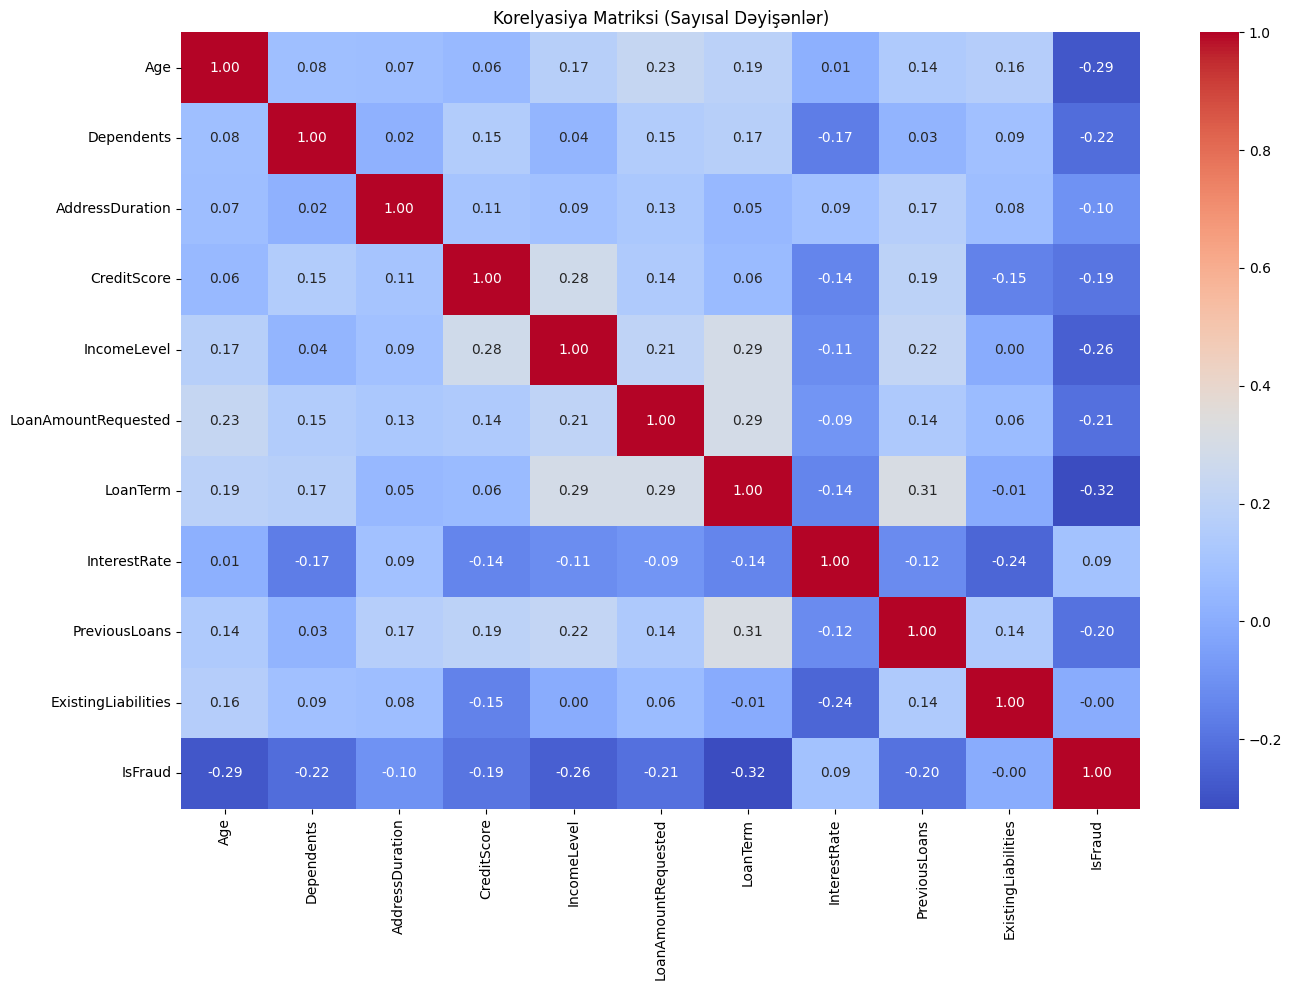

In [ ]:
# Korelyasiya matriksi
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_columns + ['IsFraud']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelyasiya Matriksi (Sayısal Dəyişənlər)")
plt.tight_layout()
plt.show()

Inbalance Check

In [ ]:
import plotly.express as px
labels=["Genuine","Fraud"]

fraud_or_not = df["IsFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['IsFraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

1. Target dəyişənin (Is_Fraud) paylanması

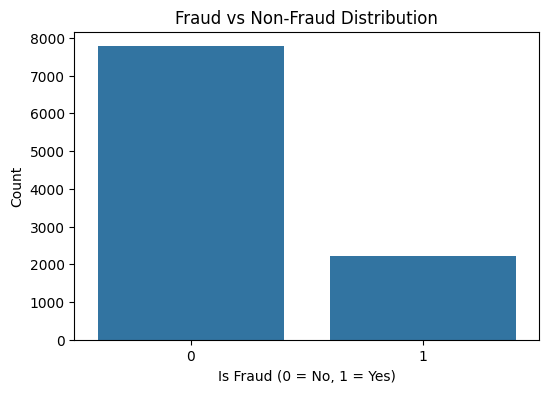

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='IsFraud')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Countplot — Hər card tipinde fraud və non-fraud əməliyyatların sayını göstərir

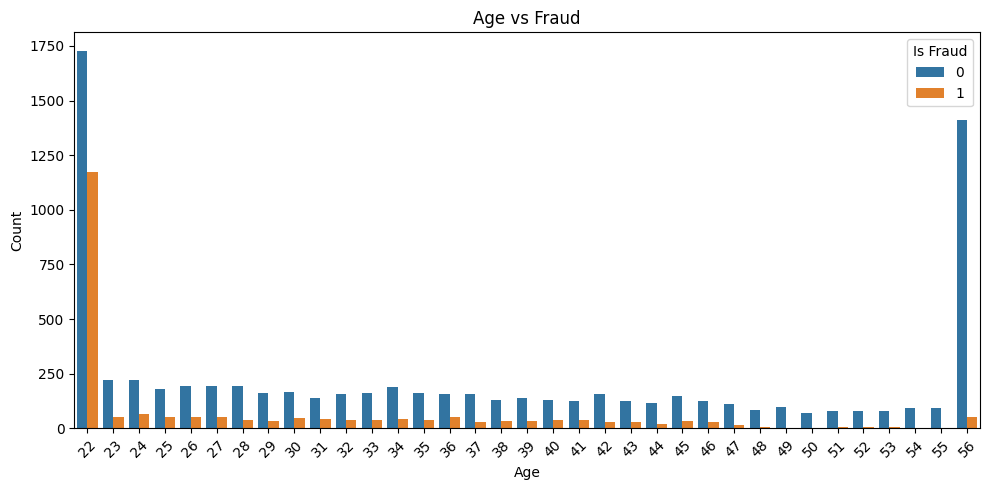

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age', hue='IsFraud')
plt.title("Age vs Fraud")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

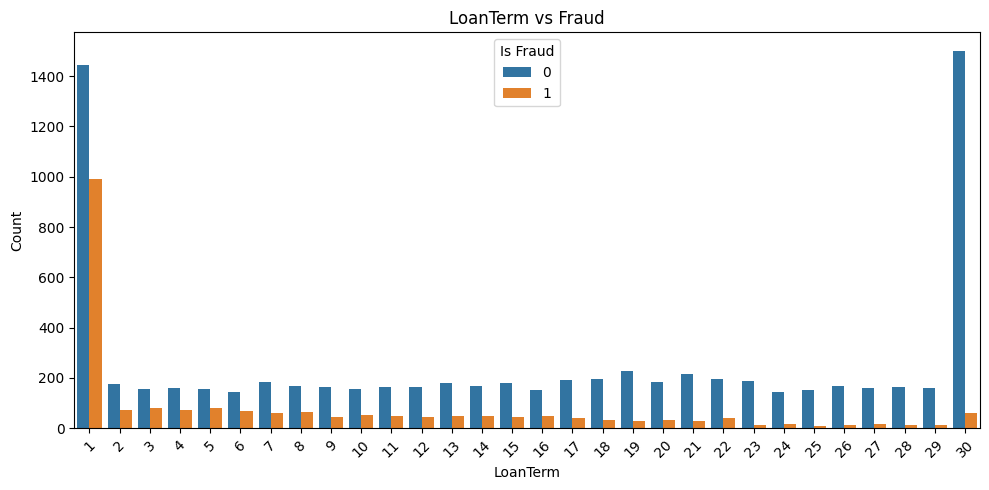

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='LoanTerm', hue='IsFraud')
plt.title("LoanTerm vs Fraud")
plt.xlabel("LoanTerm")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

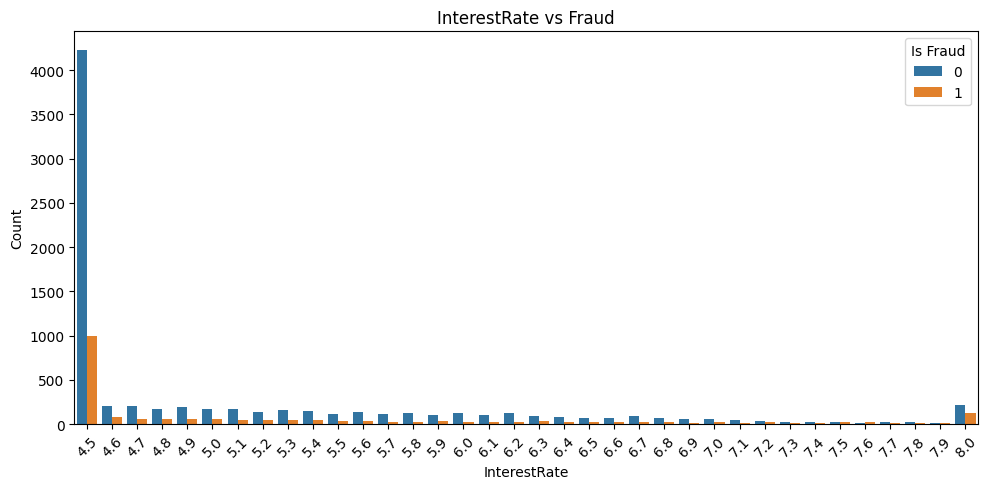

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='InterestRate', hue='IsFraud')
plt.title("InterestRate vs Fraud")
plt.xlabel("InterestRate")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

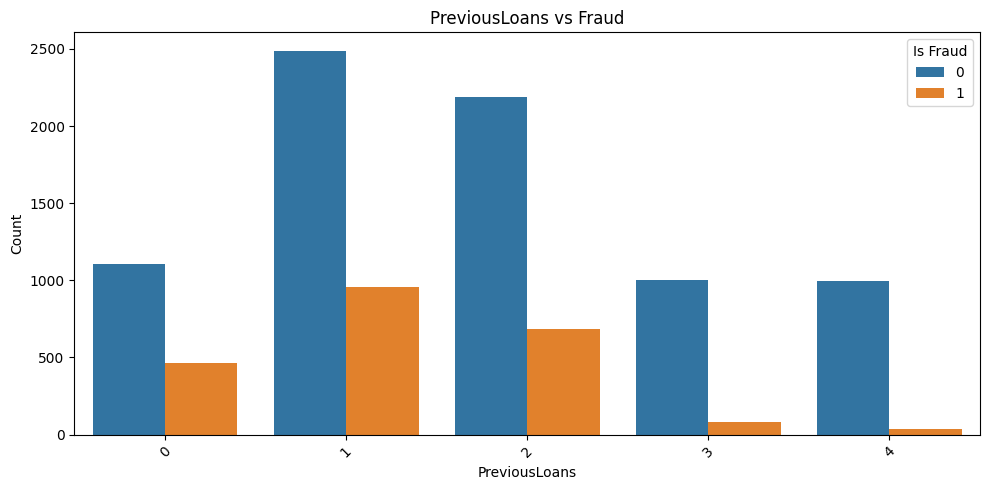

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PreviousLoans', hue='IsFraud')
plt.title("PreviousLoans vs Fraud")
plt.xlabel("PreviousLoans")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

Sayısal dəyişənlərin paylanması (Histogram)

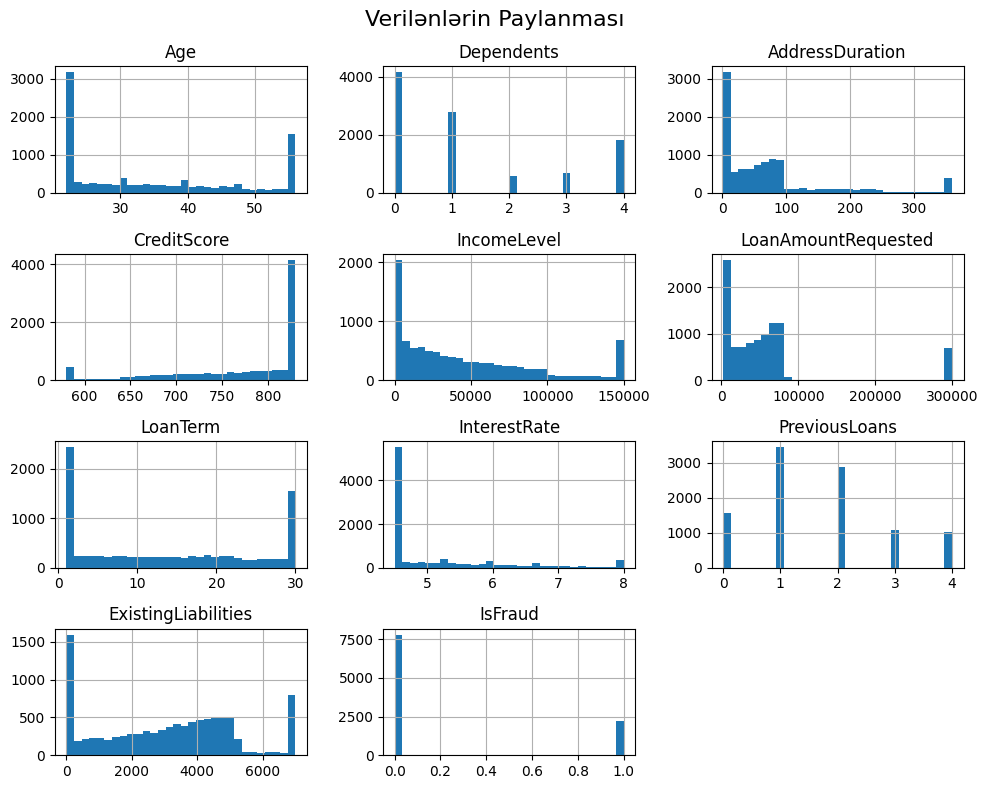

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(10, 8))

plt.suptitle('Verilənlərin Paylanması', fontsize=16)

plt.xlabel('Dəyərlər', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

What is the average amount of customers in the dataset ?

In [ ]:
# average_amount = df['amount'].mean()
# print("Average amount:", average_amount)

What is the most common Merchant_Category ?

In [ ]:
# most_common_item = df['Merchant_Category'].mode()[0]
# print("Most Common Merchant_Category:", most_common_item)

What is the most common payment method used by customers ?

In [ ]:
# most_common_payment_method = df['Transaction_Type'].mode()[0]
# print("Most Common Payment Method:", most_common_payment_method)

What is the average purchase amount for customers with Fraud Transactions of 'Yes' and 'No' ?

In [ ]:
# avg_purchase_subscription_yes = df[df['is_fraudulent'] == 1]['amount'].mean()
# avg_purchase_subscription_no = df[df['is_fraudulent'] == 0]['amount'].mean()
# print("Average Fraud Transaction Amount:", avg_purchase_subscription_yes)
# print("Average Non-Fraud Transaction Amount:", avg_purchase_subscription_no)

What is the most common day for transactions ?

In [ ]:
# most_common_season = df['transaction_time'].mode()[0]
# print("Most Common day for transactions:", most_common_season)

# 5. DATA CLEANING

Boş (NaN) dəyərlərin idarə olunması (silinməsi, doldurulması).

Dublikatların təmizlənməsi.

Uyğunsuz və səhv məlumatların düzəldilməsi.

Qeyri-dəqiq, anormal və çıxıntılı (outlier) dəyərlərin müəyyənləşdirilməsi və idarə edilməsi.

Formatların standartlaşdırılması (tarix formatları, kateqorik etiketlər və s.).

Boş dəyərlərin yoxlanması

In [ ]:
# Hər bir sütunda neçə boş (NaN) dəyər var
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Boş dəyərlər:\n", missing_values)


Boş dəyərlər:
 Series([], dtype: int64)


Dublikatların Aşkarlanması və Təmizlənməsi

In [ ]:
# Datasetdə neçə dublikat sətrin olduğunu yoxla
duplicate_rows = df.duplicated()
print(f"Tapılan dublikat sətr sayı: {duplicate_rows.sum()}")

# Dublikatları sil
df.drop_duplicates(inplace=True)
print(f"Dublikatlar silindikdən sonra dataset ölçüsü: {df.shape}")


Tapılan dublikat sətr sayı: 0
Dublikatlar silindikdən sonra dataset ölçüsü: (10000, 29)


In [ ]:
df.head()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,0
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,0
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,0
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,1
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

Uyğunsuz və səhv məlumatların düzəldilməsi.

In [ ]:
df['IncomeLevel'].value_counts()

,count
IncomeLevel,
0,1179
150000,630
1833,4
9368,3
506,3
...,...
13375,1
127142,1
33776,1


In [ ]:
# Gəlir aralıqları və etiketlər
bins = [0, 1000, 2000, 4000, 6000, 9000, 15000, float('inf')]
labels = [
    'Very Low income',
    'Low income',
    'Lower-middle income',
    'Middle income',
    'Upper-middle income',
    'High income',
    'Very High income'
]

# Qruplaşdırılmış income sütunu əlavə et
df['IncomeLevel'] = pd.cut(df['IncomeLevel'], bins=bins, labels=labels, right=False)


In [ ]:
df['CreditScore'].value_counts()

,count
CreditScore,
830,3768
580,428
818,58
825,56
821,54
...,...
607,2
601,2
585,2


In [ ]:
# Kredit skorunun aralığı və etiketləri
credit_bins = [300, 500, 580, 670, 740, 800, float('inf')]
credit_labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Yeni sütun əlavə edək
df['CreditScore'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels, right=False)


In [ ]:
df['LoanAmountRequested'].value_counts()

,count
LoanAmountRequested,
2000,1972
300000,686
64676,3
66841,3
81321,3
...,...
29118,1
5836,1
14717,1


In [ ]:
# Loan amount üçün bin və etiketlər
loan_bins = [0, 1000, 5000, 10000, 20000, 50000, float('inf')]
loan_labels = [
    'Micro loan',
    'Small loan',
    'Medium loan',
    'Large loan',
    'Very large loan',
    'High-value loan'
]

# Yeni sütun əlavə et
df['LoanAmountRequested'] = pd.cut(df['LoanAmountRequested'], bins=loan_bins, labels=loan_labels, right=False)


In [ ]:
df['ExistingLiabilities'].value_counts()

,count
ExistingLiabilities,
0,1417
7000,766
4041,8
4831,8
4624,7
...,...
1155,1
186,1
1590,1


Bu sütunda dəyər çox olduğu üçün dəyərlər müəyyən kateqoriyalara salınır.

In [ ]:
liability_bins = [0, 1000, 5000, 10000, 20000, float('inf')]
liability_labels = [
    'No/Low debt',
    'Moderate debt',
    'Significant debt',
    'High debt',
    'Critical debt'
]

# Yeni sütun əlavə et
df['ExistingLiabilities'] = pd.cut(df['ExistingLiabilities'], bins=liability_bins, labels=liability_labels, right=False)

hər sütun üçün unikal dəyərlər və onların sayı

In [ ]:
object_cols = df.select_dtypes(include='object').columns
# Hər biri üçün unikal dəyərləri göstər
for col in object_cols:
    print(f"\n📌 Sütun: {col}")
    print(df[col].value_counts(dropna=False))


📌 Sütun: Occupation
Occupation
Manager               1638
Engineer              1546
Technician             597
Artist                 595
Doctor                 591
Accountant             558
Designer               488
Self-employed          473
Entrepreneur           427
Teacher                421
Musician               419
Chef                   338
Unemployed             318
Architect              298
Software Developer     279
Clerk                  263
Retired                261
Student                259
Lawyer                 231
Name: count, dtype: int64

📌 Sütun: MaritalStatus
MaritalStatus
Single      5551
Divorced    2457
Married     1992
Name: count, dtype: int64

📌 Sütun: ResidentialStatus
ResidentialStatus
Own                  5057
Rent                 4528
Live with Parents     415
Name: count, dtype: int64

📌 Sütun: PurposeoftheLoan
PurposeoftheLoan
home         3463
auto         2221
personal     1999
education    1164
travel        579
medical       574
Name: count,

Rəqəmsal (sayısal) sütunların seçilməsi

In [ ]:
# Sayısal sütunları seçirik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove("IsFraud")  # hədəf sütunu çıxarırıq
print("Sayısal sütunlar:", numeric_cols)


Sayısal sütunlar: ['Age', 'Dependents', 'AddressDuration', 'LoanTerm', 'InterestRate', 'PreviousLoans']


Boxplot ilə çıxıntıların vizual analizi

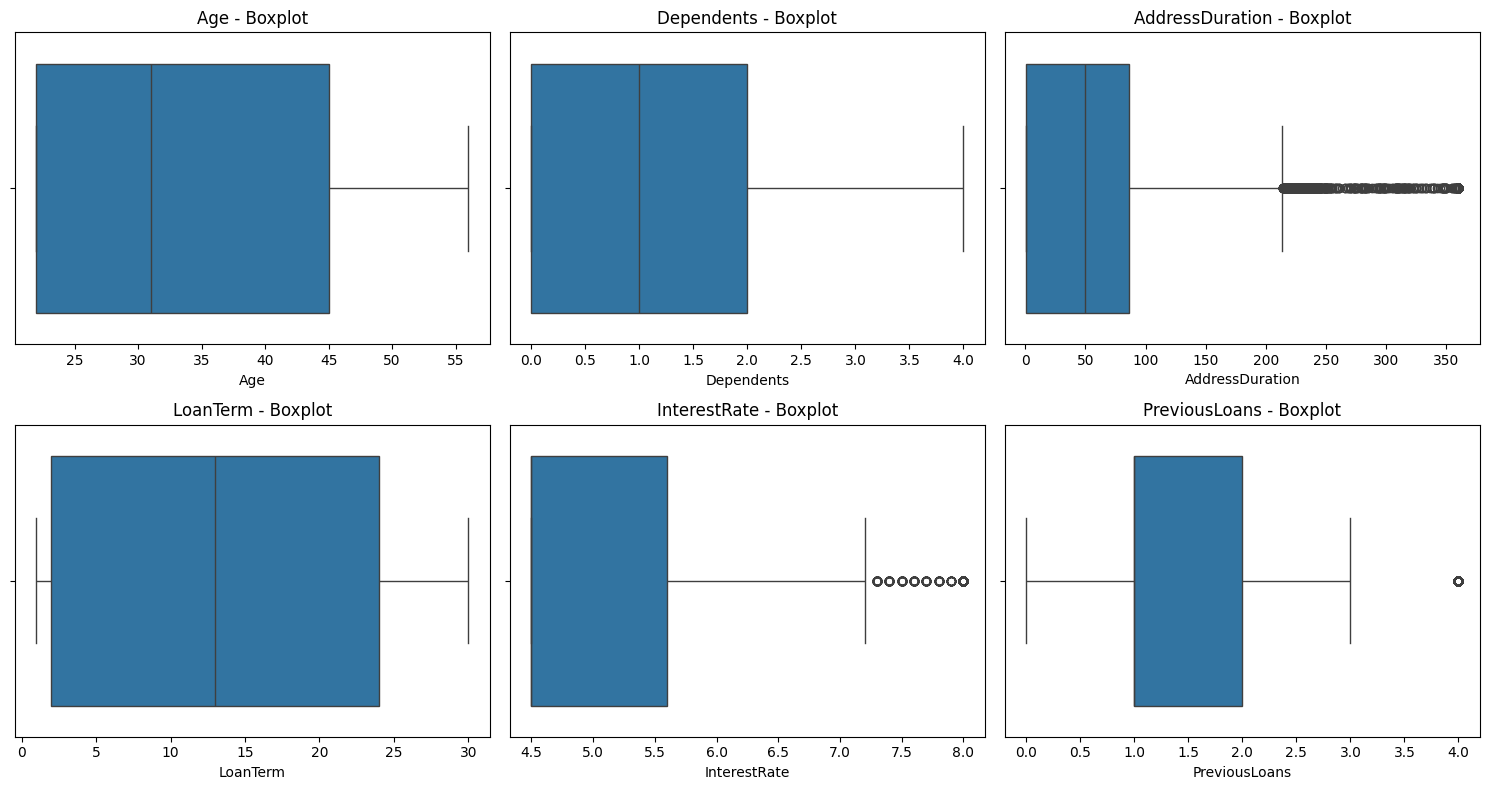

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  # ilk 6 sütunu göstəririk (vizual üçün kifayətdir)
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()

IQR metoduna əsasən outlier-lərin silinməsi

In [ ]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        print(f"{col} sütununda {len(outliers)} çıxıntı dəyər tapıldı.")
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Outlier-ləri təmizləyirik
df_cleaned = remove_outliers_iqr(df.copy(), numeric_cols)
print(f"Təmizlənmiş data ölçüsü: {df_cleaned.shape}")


Age sütununda 0 çıxıntı dəyər tapıldı.
Dependents sütununda 0 çıxıntı dəyər tapıldı.
AddressDuration sütununda 793 çıxıntı dəyər tapıldı.
LoanTerm sütununda 0 çıxıntı dəyər tapıldı.
InterestRate sütununda 674 çıxıntı dəyər tapıldı.
PreviousLoans sütununda 851 çıxıntı dəyər tapıldı.
Təmizlənmiş data ölçüsü: (7682, 29)


Tarix Formatlarının Standartlaşdırılması

In [ ]:
# Tarix formatına çevir və səhvləri NaT kimi saxla
df['TimeofTransaction'] = pd.to_datetime(df['TimeofTransaction'], errors='coerce', dayfirst=True)

# təkcə saatı almaq
df['transaction_hour'] = df['TimeofTransaction'].dt.hour

# 6. FEATURE ENGINEERING

Yeni dəyişənlərin yaradılması (məsələn, tarixdən ay və ya həftə günü çıxarmaq).

Kategorik dəyişənlərin kodlaşdırılması (OneHotEncoder, LabelEncoder).

Sayısal dəyişənlərin miqyaslanması və ya normallaşdırılması (StandardScaler, MinMaxScaler).

Lazımsız dəyişənlərin çıxarılması (feature selection).

Məlumatın model üçün uyğun hala gətirilməsi.

Lazım olmayan sütunların silinməsi bunu EDA hissəsində Target sutunumuzla əlaqə əsasında təsirinə və bizə datanın lazımlılığına görə qərar veririk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        10000 non-null  int64         
 1   Occupation                 10000 non-null  object        
 2   MaritalStatus              10000 non-null  object        
 3   Dependents                 10000 non-null  int64         
 4   ResidentialStatus          10000 non-null  object        
 5   AddressDuration            10000 non-null  int64         
 6   CreditScore                10000 non-null  category      
 7   IncomeLevel                10000 non-null  category      
 8   LoanAmountRequested        10000 non-null  category      
 9   LoanTerm                   10000 non-null  int64         
 10  PurposeoftheLoan           10000 non-null  object        
 11  Collateral                 10000 non-null  object        
 12  Inter

Silinən sütunlar target sütunumuz üçün əhəmiyyəti olmayan modelə təsir etməyən sütunlardır.Əlavə olaraq silinən sütunlar isə çeşidlilik çoxdursa  və encoding etmək məqsədə uyğun deyilsədə yenə silinir

In [ ]:
# Silmək istədiyiniz sütunların siyahısı
columns_to_drop = ['Dependents', 'ResidentialStatus', 'AddressDuration','ChangeinBehavior', 'TimeofTransaction', 'LocationofApplication', 'Referral',]

# Sütunları silmək
df = df.drop(columns=columns_to_drop)

**Kategorik dəyişənlərin kodlaşdırılması**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        10000 non-null  int64   
 1   Occupation                 10000 non-null  object  
 2   MaritalStatus              10000 non-null  object  
 3   CreditScore                10000 non-null  category
 4   IncomeLevel                10000 non-null  category
 5   LoanAmountRequested        10000 non-null  category
 6   LoanTerm                   10000 non-null  int64   
 7   PurposeoftheLoan           10000 non-null  object  
 8   Collateral                 10000 non-null  object  
 9   InterestRate               10000 non-null  float64 
 10  PreviousLoans              10000 non-null  int64   
 11  ExistingLiabilities        10000 non-null  category
 12  ApplicationBehavior        10000 non-null  object  
 13  AccountActivity            10000

Age sütunu müəyyən yaş aralığı olaraq kateqoriyalandırılır.

In [ ]:
# def categorize_age(Age):
#    if 18 <= Age < 40:
#         return 'Young Adult'
#    elif 40 <= Age < 60:
#         return 'Middle-Aged'
#    else:
#         return 'Senior'

# df['Age_Category'] = df['Age'].apply(categorize_age)

In [ ]:
# df = df.drop('Age', axis=1)
# df.info()

In [ ]:
# df['Age_Category'].value_counts()

In [ ]:
# # siralam problemi yasamayaq deye one hot encoding
# # One-Hot Encoding etmək
# df = pd.get_dummies(df, columns=['Age_Category'], drop_first=True)

In [ ]:
# # Category tipindeki sütunları alın
# category_columns = df.select_dtypes(include=['category']).columns.tolist()

# # Object tipindeki sütunları alın
# object_columns = df.select_dtypes(include=['object']).columns.tolist()

# # butun categorik ve object sütunlar için One-Hot Encoding :
# df = pd.get_dummies(df, columns=object_columns + category_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Bütün category sütunlarını seç
cat_cols = df.select_dtypes(include='category').columns

# Hər biri üçün Label Encoding (yenidən sütun yaratmadan)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  int64  
 2   MaritalStatus              10000 non-null  int64  
 3   CreditScore                10000 non-null  int64  
 4   IncomeLevel                10000 non-null  int64  
 5   LoanAmountRequested        10000 non-null  int64  
 6   LoanTerm                   10000 non-null  int64  
 7   PurposeoftheLoan           10000 non-null  int64  
 8   Collateral                 10000 non-null  int64  
 9   InterestRate               10000 non-null  float64
 10  PreviousLoans              10000 non-null  int64  
 11  ExistingLiabilities        10000 non-null  int64  
 12  ApplicationBehavior        10000 non-null  int64  
 13  AccountActivity            10000 non-null  int6

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'IsFraud']


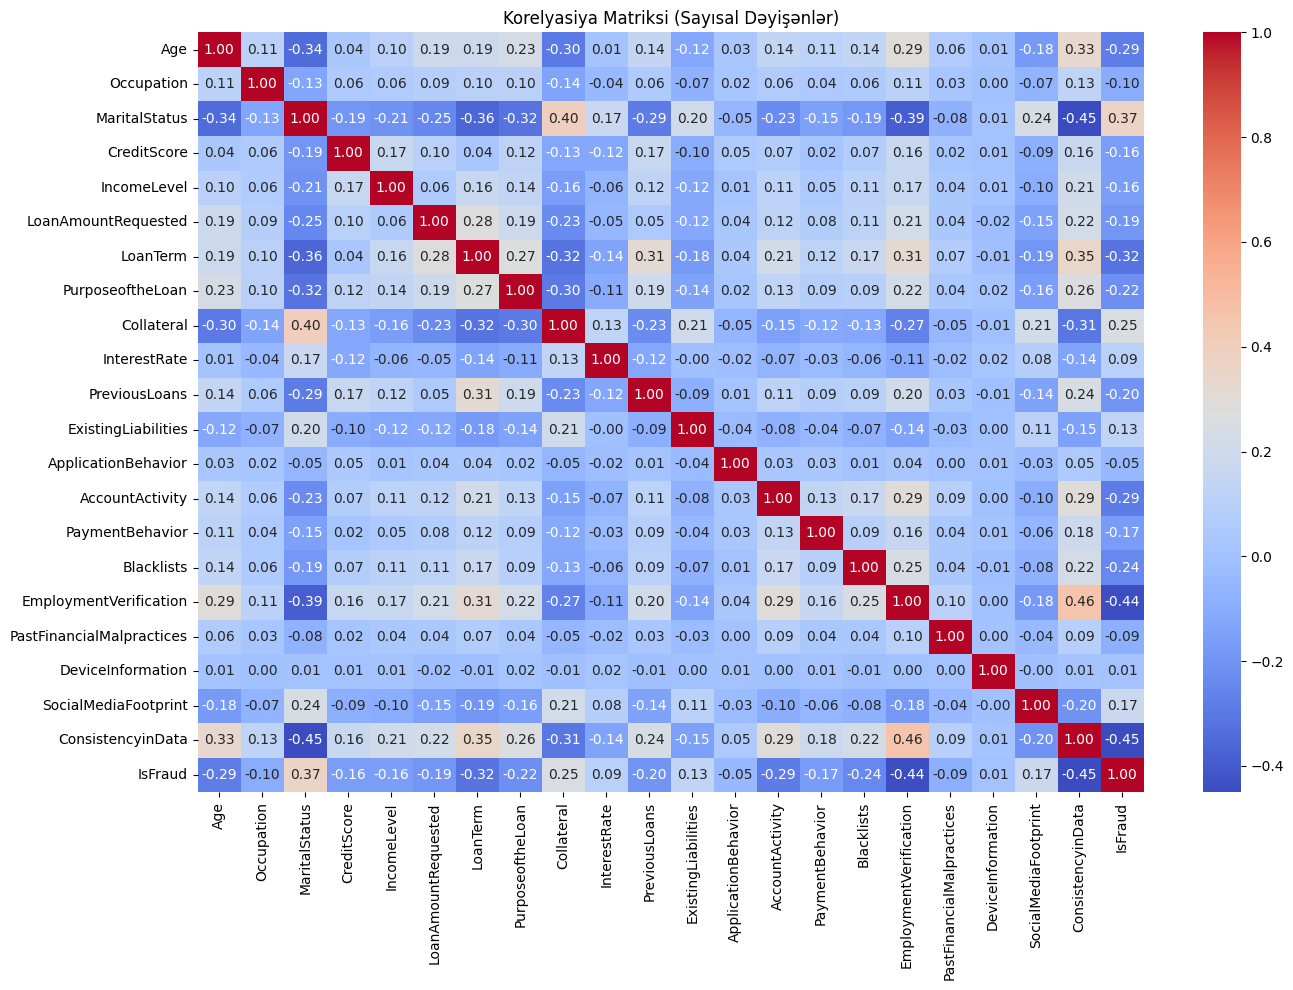

In [ ]:
# Korelyasiya matriksi
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_columns + ['IsFraud']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelyasiya Matriksi (Sayısal Dəyişənlər)")
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  int64  
 2   MaritalStatus              10000 non-null  int64  
 3   CreditScore                10000 non-null  int64  
 4   IncomeLevel                10000 non-null  int64  
 5   LoanAmountRequested        10000 non-null  int64  
 6   LoanTerm                   10000 non-null  int64  
 7   PurposeoftheLoan           10000 non-null  int64  
 8   Collateral                 10000 non-null  int64  
 9   InterestRate               10000 non-null  float64
 10  PreviousLoans              10000 non-null  int64  
 11  ExistingLiabilities        10000 non-null  int64  
 12  ApplicationBehavior        10000 non-null  int64  
 13  AccountActivity            10000 non-null  int6

In [ ]:
# Silmək istədiyiniz sütunların siyahısı
columns_to_drop = ['Age','IncomeLevel', 'CreditScore','ExistingLiabilities','Occupation', 'LoanTerm','PurposeoftheLoan', 'PreviousLoans', 'ApplicationBehavior', 'AccountActivity','PaymentBehavior','Blacklists','EmploymentVerification','PastFinancialMalpractices','ConsistencyinData','transaction_hour',]

# Sütunları silmək
df = df.drop(columns=columns_to_drop)

**Sayısal dəyişənlərin miqyaslanması və ya normallaşdırılması (StandardScaler, MinMaxScaler).**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sayısal sütunları seç (target sütunu xaric)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('IsFraud')  # Target sütunu çıxarırıq

StandardScaler ilə miqyaslama (z-score normalizasiya):

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. DATA SPLITTING , MODEL SELECTION,MODEL TRAINING,MODEL EVALUATION

Dataset train və test (bəzən validation) olaraq bölünür (train_test_split).

Modelin öyrənməsi üçün və sonradan test üçün ayrılır.

Adətən, 70-30%, 80-20% nisbətində olur.

Layihə məqsədinə uyğun algoritmlər seçilir (məsələn, Regression, Classification, Clustering).

Bir neçə model sınanacaqsa, ilkin seçimlər edilir.

Model train datası üzərində öyrədilir (fit metodu).

Hər model üçün parametrlər təyin edilə bilər.

Modelin performansı test datası üzərində ölçülür.

Müvafiq qiymətləndirmə metrikləri hesablanır:

Regression üçün: RMSE, MAE, R²

Classification üçün: Accuracy, Precision, Recall, F1-score, ROC-AUC

Nəticələr analiz edilir, modelin zəif tərəfləri araşdırılır.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MaritalStatus         10000 non-null  float64
 1   LoanAmountRequested   10000 non-null  float64
 2   Collateral            10000 non-null  float64
 3   InterestRate          10000 non-null  float64
 4   DeviceInformation     10000 non-null  float64
 5   SocialMediaFootprint  10000 non-null  float64
 6   IsFraud               10000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


# **Burada bir neçə modeli yoxlayırıq ən yaxşı nəticə verəni tapmaq üçün.**

In [ ]:
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Standartlaşdırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model siyahısı (yenilənmiş versiya):
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Artıq SMOTE istifadə etmirik
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")




===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.7820    0.9756    0.8681      1555
           1     0.3667    0.0494    0.0871       445

    accuracy                         0.7695      2000
   macro avg     0.5743    0.5125    0.4776      2000
weighted avg     0.6896    0.7695    0.6943      2000

ROC AUC Score: 0.7715

===== Random Forest =====
              precision    recall  f1-score   support

           0     0.8455    0.8797    0.8623      1555
           1     0.5105    0.4382    0.4716       445

    accuracy                         0.7815      2000
   macro avg     0.6780    0.6590    0.6669      2000
weighted avg     0.7709    0.7815    0.7753      2000

ROC AUC Score: 0.7710

===== XGBoost =====
              precision    recall  f1-score   support

           0     0.8473    0.8849    0.8657      1555
           1     0.5239    0.4427    0.4799       445

    accuracy                         0.7865      2000
   

**Data target sütunu inbalace olduğu üçün bir neçə oversampling metodu yoxlayırıq.**



### 🔄 Over Sampling Method: SMOTE ###

===== 📊 Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9342    0.6212    0.7462      1555
           1     0.3903    0.8472    0.5344       445

    accuracy                         0.6715      2000
   macro avg     0.6623    0.7342    0.6403      2000
weighted avg     0.8132    0.6715    0.6991      2000

ROC AUC Score: 0.7716


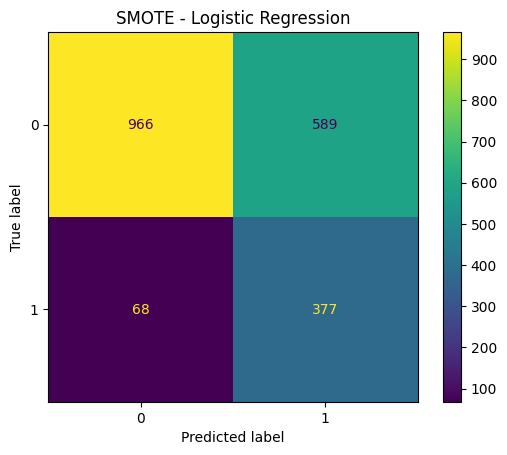


===== 📊 Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8899    0.7588    0.8192      1555
           1     0.4436    0.6719    0.5344       445

    accuracy                         0.7395      2000
   macro avg     0.6668    0.7154    0.6768      2000
weighted avg     0.7906    0.7395    0.7558      2000

ROC AUC Score: 0.7661


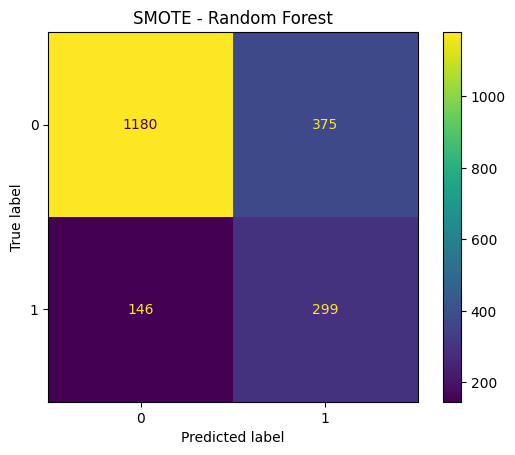


===== 📊 Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9002    0.7543    0.8209      1555
           1     0.4519    0.7079    0.5517       445

    accuracy                         0.7440      2000
   macro avg     0.6761    0.7311    0.6863      2000
weighted avg     0.8005    0.7440    0.7610      2000

ROC AUC Score: 0.7920


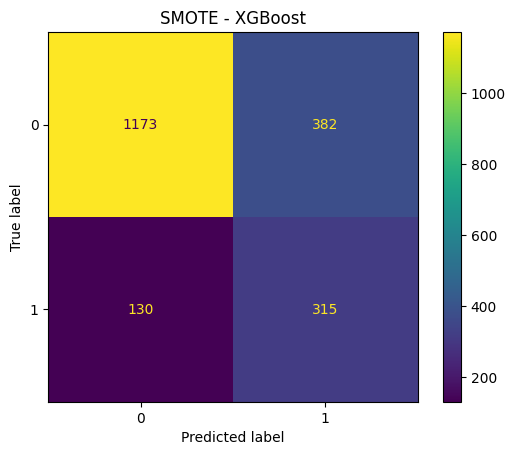


===== 📊 Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8838    0.7730    0.8247      1555
           1     0.4484    0.6449    0.5290       445

    accuracy                         0.7445      2000
   macro avg     0.6661    0.7090    0.6769      2000
weighted avg     0.7870    0.7445    0.7589      2000

ROC AUC Score: 0.7444


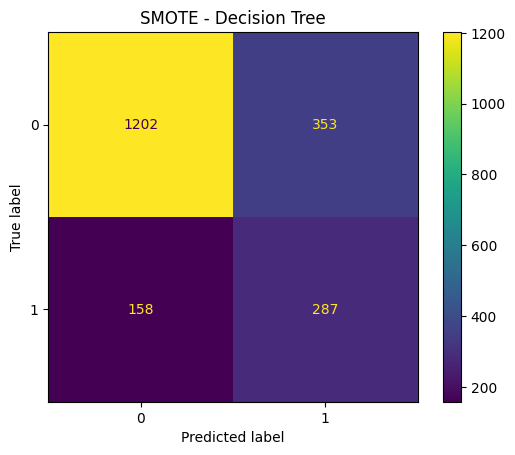


===== 📊 Model: KNN =====
              precision    recall  f1-score   support

           0     0.8568    0.8039    0.8295      1555
           1     0.4362    0.5303    0.4787       445

    accuracy                         0.7430      2000
   macro avg     0.6465    0.6671    0.6541      2000
weighted avg     0.7632    0.7430    0.7514      2000

ROC AUC Score: 0.7432


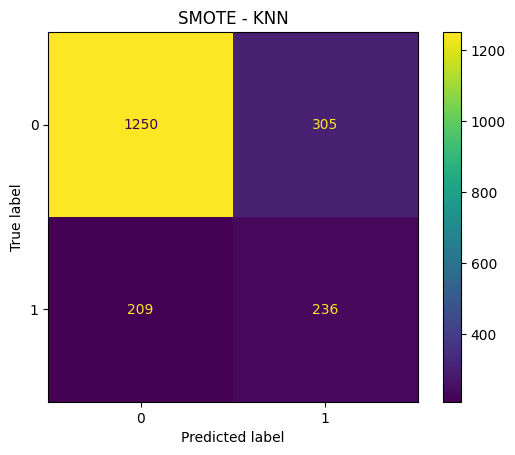



### 🔄 Over Sampling Method: ADASYN ###

===== 📊 Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9394    0.5981    0.7308      1555
           1     0.3812    0.8652    0.5292       445

    accuracy                         0.6575      2000
   macro avg     0.6603    0.7316    0.6300      2000
weighted avg     0.8152    0.6575    0.6860      2000

ROC AUC Score: 0.7701


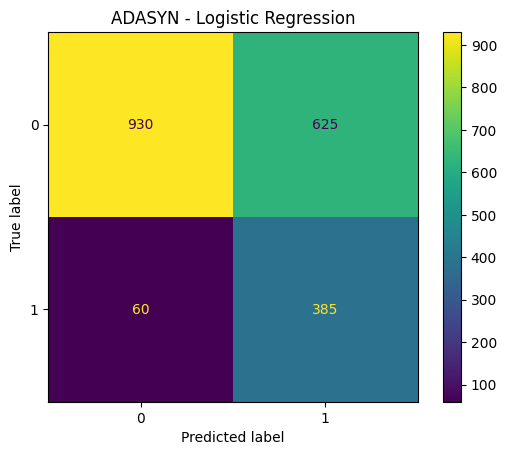


===== 📊 Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8923    0.6823    0.7733      1555
           1     0.3909    0.7124    0.5048       445

    accuracy                         0.6890      2000
   macro avg     0.6416    0.6973    0.6391      2000
weighted avg     0.7808    0.6890    0.7136      2000

ROC AUC Score: 0.7612


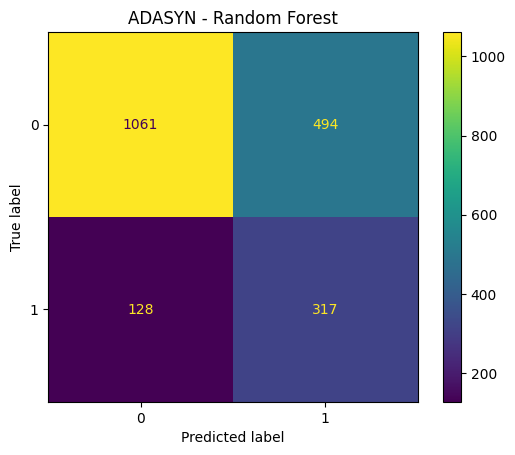


===== 📊 Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9091    0.7010    0.7916      1555
           1     0.4195    0.7551    0.5393       445

    accuracy                         0.7130      2000
   macro avg     0.6643    0.7280    0.6655      2000
weighted avg     0.8002    0.7130    0.7355      2000

ROC AUC Score: 0.7911


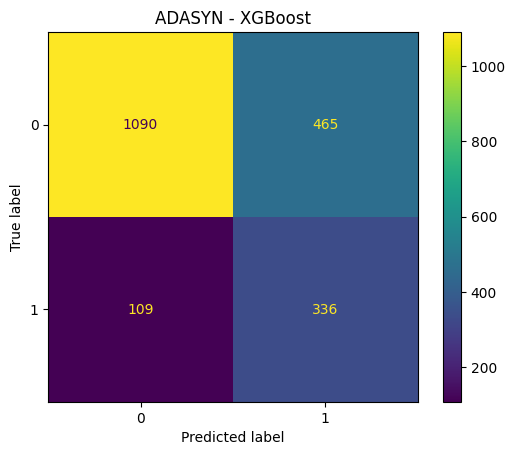


===== 📊 Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8881    0.6990    0.7823      1555
           1     0.3969    0.6921    0.5045       445

    accuracy                         0.6975      2000
   macro avg     0.6425    0.6956    0.6434      2000
weighted avg     0.7788    0.6975    0.7205      2000

ROC AUC Score: 0.7373


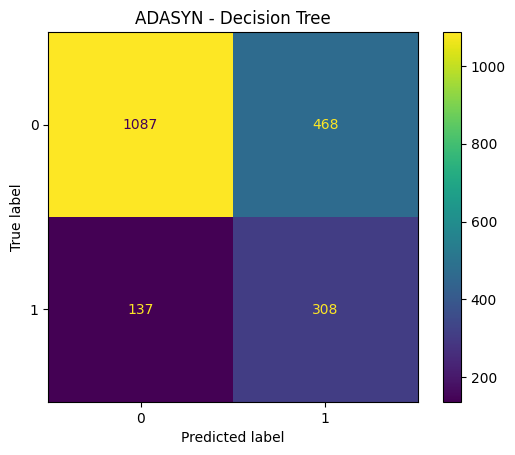


===== 📊 Model: KNN =====
              precision    recall  f1-score   support

           0     0.8582    0.7865    0.8208      1555
           1     0.4226    0.5461    0.4765       445

    accuracy                         0.7330      2000
   macro avg     0.6404    0.6663    0.6486      2000
weighted avg     0.7613    0.7330    0.7442      2000

ROC AUC Score: 0.7427


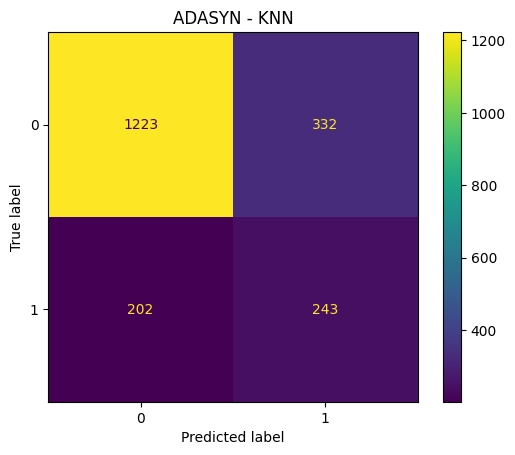



### 🔄 Over Sampling Method: Borderline-SMOTE ###

===== 📊 Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9371    0.6032    0.7340      1555
           1     0.3824    0.8584    0.5291       445

    accuracy                         0.6600      2000
   macro avg     0.6597    0.7308    0.6315      2000
weighted avg     0.8136    0.6600    0.6884      2000

ROC AUC Score: 0.7729


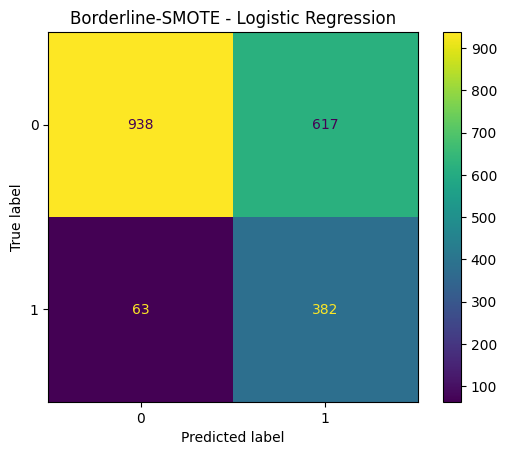


===== 📊 Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8708    0.7280    0.7930      1555
           1     0.3957    0.6225    0.4838       445

    accuracy                         0.7045      2000
   macro avg     0.6332    0.6752    0.6384      2000
weighted avg     0.7651    0.7045    0.7242      2000

ROC AUC Score: 0.7441


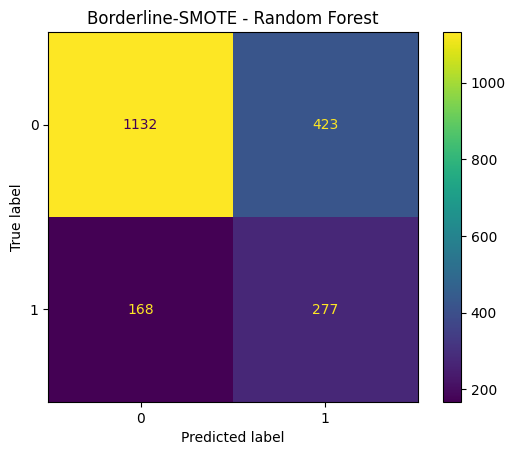


===== 📊 Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9031    0.6952    0.7856      1555
           1     0.4097    0.7393    0.5272       445

    accuracy                         0.7050      2000
   macro avg     0.6564    0.7173    0.6564      2000
weighted avg     0.7933    0.7050    0.7281      2000

ROC AUC Score: 0.7760


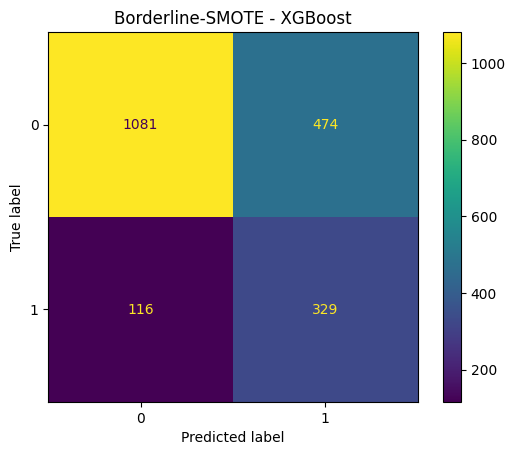


===== 📊 Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8637    0.7376    0.7957      1555
           1     0.3929    0.5933    0.4727       445

    accuracy                         0.7055      2000
   macro avg     0.6283    0.6654    0.6342      2000
weighted avg     0.7589    0.7055    0.7238      2000

ROC AUC Score: 0.7167


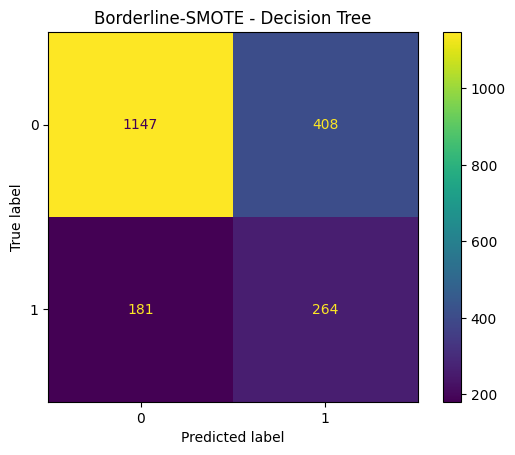


===== 📊 Model: KNN =====
              precision    recall  f1-score   support

           0     0.8598    0.8045    0.8312      1555
           1     0.4422    0.5416    0.4869       445

    accuracy                         0.7460      2000
   macro avg     0.6510    0.6730    0.6590      2000
weighted avg     0.7669    0.7460    0.7546      2000

ROC AUC Score: 0.7517


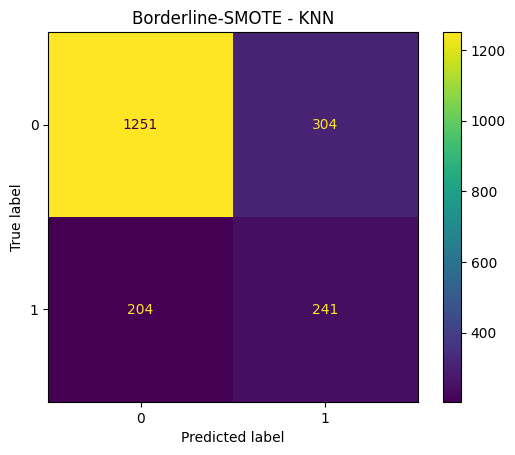



### 🔄 Over Sampling Method: RandomOverSampler ###

===== 📊 Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9328    0.6244    0.7481      1555
           1     0.3910    0.8427    0.5342       445

    accuracy                         0.6730      2000
   macro avg     0.6619    0.7336    0.6411      2000
weighted avg     0.8122    0.6730    0.7005      2000

ROC AUC Score: 0.7716


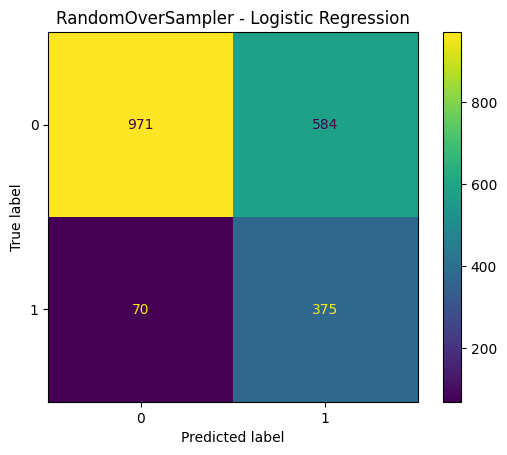


===== 📊 Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.9030    0.7068    0.7929      1555
           1     0.4176    0.7348    0.5326       445

    accuracy                         0.7130      2000
   macro avg     0.6603    0.7208    0.6628      2000
weighted avg     0.7950    0.7130    0.7350      2000

ROC AUC Score: 0.7663


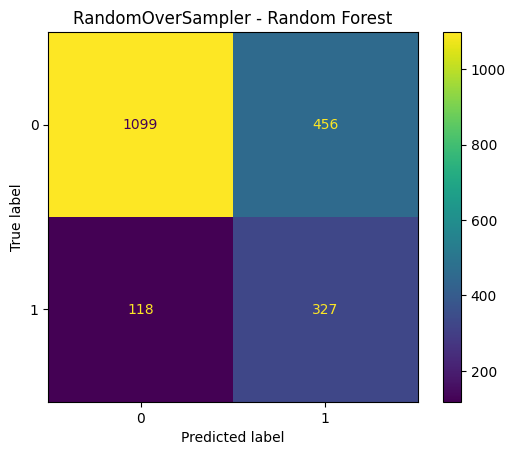


===== 📊 Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9108    0.7093    0.7975      1555
           1     0.4271    0.7573    0.5462       445

    accuracy                         0.7200      2000
   macro avg     0.6690    0.7333    0.6719      2000
weighted avg     0.8032    0.7200    0.7416      2000

ROC AUC Score: 0.7866


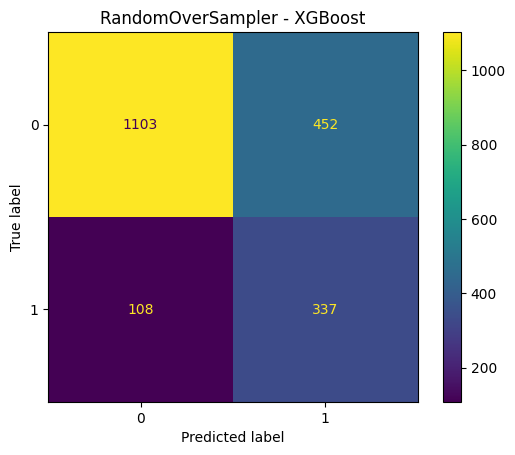


===== 📊 Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.9035    0.7106    0.7955      1555
           1     0.4208    0.7348    0.5352       445

    accuracy                         0.7160      2000
   macro avg     0.6622    0.7227    0.6654      2000
weighted avg     0.7961    0.7160    0.7376      2000

ROC AUC Score: 0.7442


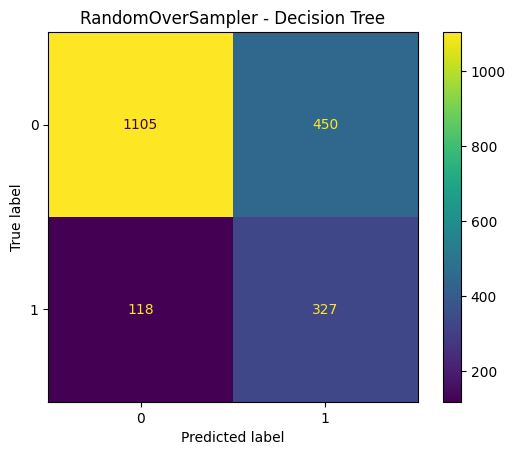


===== 📊 Model: KNN =====
              precision    recall  f1-score   support

           0     0.8592    0.7968    0.8268      1555
           1     0.4337    0.5438    0.4826       445

    accuracy                         0.7405      2000
   macro avg     0.6465    0.6703    0.6547      2000
weighted avg     0.7645    0.7405    0.7502      2000

ROC AUC Score: 0.7307


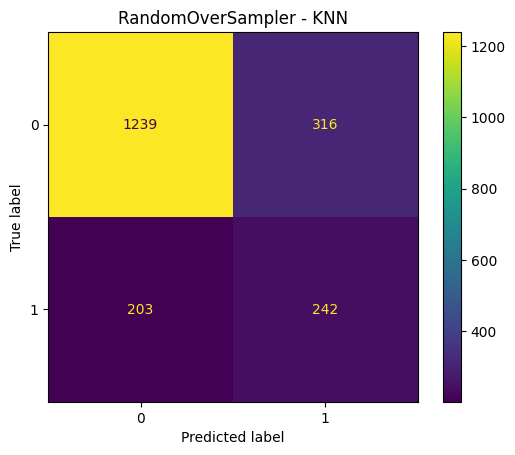

In [ ]:
# Gərəkli kitabxanalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
import matplotlib.pyplot as plt

# 1. X və y ayır
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Standartlaşdırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Over Sampling metodları
oversamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42)
}

# 5. Modellər
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 6. Hər sampling metodunu sınamaq
for over_name, oversampler in oversamplers.items():
    print(f"\n\n### 🔄 Over Sampling Method: {over_name} ###")

    # Apply oversampling
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        print(f"\n===== 📊 Model: {model_name} =====")
        print(classification_report(y_test, preds, digits=4))
        if proba is not None:
            auc = roc_auc_score(y_test, proba)
            print(f"ROC AUC Score: {auc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"{over_name} - {model_name}")
        plt.show()



**İnbalans Düzəlişi üçün Undersampler etdik**

In [ ]:

# 1. Target və Features
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Undersampling tətbiq et
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 3. Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 4. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. XGBoost üçün class ratio yenidən hesablanır (balanslı olduqdan sonra ehtiyac qalmaya bilər, amma əlavə edə bilərik)
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# 6. Modellər
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier()
}

# 7. Modelləri öyrət və qiymətləndir
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")



===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8109

===== Random Forest =====
              precision    recall  f1-score   support

           0     0.7431    0.6614    0.6999       446
           1     0.6943    0.7708    0.7306       445

    accuracy                         0.7160       891
   macro avg     0.7187    0.7161    0.7152       891
weighted avg     0.7187    0.7160    0.7152       891

ROC AUC Score: 0.7863

===== XGBoost =====
              precision    recall  f1-score   support

           0     0.7443    0.6592    0.6992       446
           1     0.6935    0.7730    0.7311       445

    accuracy                         0.7160       891
   

Artıq bu yuxarıdaki kodda random forest modleində daha yaxşı  nəticə aldığımızı görürük.

Neural Network Modeli

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
import pandas as pd
# 3. Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. StandardScaler ilə miqyaslandırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Neural Network modeli
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(curve='PR')])

# 6. Modelin öyrədilməsi
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

# 7. Qiymətləndirmə
y_pred_probs = model.predict(X_test_scaled).ravel()
avg_precision = average_precision_score(y_test, y_pred_probs)

print(f"Average Precision Score (PR AUC): {avg_precision:.4f}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - auc: 0.2517 - loss: 0.5541 - val_auc: 0.4773 - val_loss: 0.4390
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 0.4917 - loss: 0.4222 - val_auc: 0.4830 - val_loss: 0.4238
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5010 - loss: 0.4110 - val_auc: 0.4858 - val_loss: 0.4205
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5034 - loss: 0.4081 - val_auc: 0.4873 - val_loss: 0.4187
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5085 - loss: 0.4063 - val_auc: 0.4885 - val_loss: 0.4175
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5106 - loss: 0.4050 - val_auc: 0.4884 - val_loss: 0.4166
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5127 - loss: 0.4040 - val_auc: 0.4899 - val_loss: 0.4161
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.5131 - loss: 0.4032 - val_auc: 0.4918 - val_loss: 0.4157
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - au

**Bir neçə modeli yoxladıq və sonda bu qərar gəldikki : xgb boost və Undersampling edilmis yaxşı nəticə verir**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Target və feature-lar
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Random Forest modeli (imbalans düzəlişi ilə)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 4. Modeli öyrət və qiymətləndir
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
proba = rf_model.predict_proba(X_test)[:, 1]

# Nəticələrin çapı
print("===== Random Forest =====")
print(classification_report(y_test, preds, digits=4))
auc = roc_auc_score(y_test, proba)
print(f"ROC AUC Score: {auc:.4f}")


===== Random Forest =====
              precision    recall  f1-score   support

           0     0.9048    0.7215    0.8029      1555
           1     0.4303    0.7348    0.5427       445

    accuracy                         0.7245      2000
   macro avg     0.6676    0.7282    0.6728      2000
weighted avg     0.7992    0.7245    0.7450      2000

ROC AUC Score: 0.7715


under sampling logistic regression

In [ ]:
# 1. Target və Features
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Undersampling tətbiq et
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 3. Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 4. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# 6. Modellər
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
}

# 7. Modelləri öyrət və qiymətləndir
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")



===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8109


# 11. MODEL TUNING & HYPERPARAMETER OPTIMIZATION

Modelin parametrləri dəyişdirilərək (Grid Search, Random Search) ən yaxşı nəticə tapılır.

Cross-validation ilə modelin stabil və ümumiləşdirilmiş performansı yoxlanılır.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import loguniform, randint
import numpy as np

 Modellərin Grid/Random Search konfiqurasiyaları

Logistic Regression (Randomized Search)

In [ ]:
logreg_params = {
    'C': loguniform(1e-3, 1e2),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # L1 üçün uyğundur
    'class_weight': ['balanced']
}

logreg = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                            logreg_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c98e6d26a10>,
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='roc_auc')

Random Forest (Grid Search)

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  rf_params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

XGBoost (Randomized Search)

In [ ]:
xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 7],
    'learning_rate': loguniform(0.01, 0.3),
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [scale_pos_weight]
}

xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                         xgb_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c98739c4110>,
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98739ebc10>,
                                        'scale_pos_weight': [np.float64(0.9994385176866929)],
                                        'subsample': [0.8, 1]},
                   random_state=42, scoring='roc_auc')

Decision Tree (Grid Search)

In [ ]:
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  dt_params, scoring='roc_auc', cv=5, n_jobs=-1)
dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='roc_auc')

KNN (Grid Search)

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(KNeighborsClassifier(),
                   knn_params, scoring='roc_auc', cv=5, n_jobs=-1)
knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

 Bütün modellərin nəticələrini çap et

In [ ]:
models = {
    "Logistic Regression": logreg.best_estimator_,
    "Random Forest": rf.best_estimator_,
    "XGBoost": xgb.best_estimator_,
    "Decision Tree": dt.best_estimator_,
    "KNN": knn.best_estimator_
}

for name, model in models.items():
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print("Ən yaxşı parametrlər:", model.get_params())
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        print(f"ROC AUC Score: {roc_auc_score(y_test, proba):.4f}")



===== Logistic Regression =====
Ən yaxşı parametrlər: {'C': np.float64(0.19069966103000435), 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8112

===== Random Forest =====
Ən yaxşı parametrlər: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2,

 Cross-validation ilə stabilik yoxlaması

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    print(f"{name} - CV ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression - CV ROC AUC: 0.7863 (+/- 0.0075)
Random Forest - CV ROC AUC: 0.8145 (+/- 0.0105)
XGBoost - CV ROC AUC: 0.8249 (+/- 0.0085)
Decision Tree - CV ROC AUC: 0.7899 (+/- 0.0105)
KNN - CV ROC AUC: 0.7607 (+/- 0.0088)


# 12. FINAL MODEL & PREDICTION

Seçilmiş və optimallaşdırılmış model ilə yeni, görünməmiş verilənlərə proqnoz verilir.

Proqnozlar saxlanılır və ya biznesə təqdim olunur.

1. Ən Yaxşı Modelin Seçilməsi

In [ ]:
best_model = models["XGBoost"]  # və ya ən yaxşı nəticə verəni


2. Yeni Verilərə Proqnoz

In [ ]:
# # Yeni verilənləri əvvəlcə əvvəlki preprocessing ilə eyni formada hazırla
# new_data_scaled = scaler.transform(new_data)  # scaler əvvəl fit edilmiş olmalıdır

# # Proqnozlar
# predictions = best_model.predict(new_data_scaled)
# probabilities = best_model.predict_proba(new_data_scaled)[:, 1]  # ehtimallar

3. Nəticələrin Saxlanması

In [ ]:
# # Nəticələri DataFrame şəklində birləşdirək
# results = new_data.copy()
# results['IsFraud_Prediction'] = predictions
# results['Fraud_Probability'] = probabilities

# # Fayl şəklində yadda saxla
# results.to_csv('fraud_predictions.csv', index=False)
# print("Proqnozlar 'fraud_predictions.csv' faylında saxlanıldı.")


# 13. MODEL DEPLOYMENT (Əgər layihə tələb edirsə)

Model real sistemə inteqrasiya edilir (web app, API, avtomatlaşdırılmış sistem və s.).

Monitorinq və yenilənmə planı hazırlanır.

Gərəkli paketləri yüklə

In [ ]:
pip install fastapi uvicorn joblib pyngrok nest_asyncio

MODELİN YADDA SAXLANMASI (save)

In [ ]:
import joblib

# Modeli və scaler-i yadda saxla
joblib.dump(best_model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Model və scaler yüklə

In [ ]:
import joblib

# Model və scaler-i yükləyirik
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
# from pyngrok import ngrok

# ngrok.kill()  # Bütün aktiv tunelləri bağlayır

Loan elave edilmis api

0% – 40%	Fırıldaqçılıq ehtimalı aşağıdır → sistem "normal" sayır
40% – 70%	Risk var, amma tam əmin deyil → diqqət tələb edir
70% – 100%	Güclü ehtimalla fırıldaqçılıq → yüksək xəbərdarlıq lazımdır

In [ ]:
# ==============================#
# 1. Lazımi paketləri quraşdır #
# ==============================#
!pip install fastapi nest_asyncio pyngrok uvicorn joblib pandas

# =========================#
# 2. İmport və ayarlamalar #
# =========================#
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Request, Form
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
import joblib
import pandas as pd
import os
from pyngrok import ngrok

nest_asyncio.apply()

# =====================#
# 3. HTML Faylını Yarat #
# =====================#
os.makedirs("templates", exist_ok=True)

with open("templates/index.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html lang="az">
<head>
    <meta charset="UTF-8">
    <title>Sahib Alizada Fraud Modeli</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://fonts.googleapis.com/css2?family=Rubik:wght@400;700&display=swap" rel="stylesheet">
    <style>
        body {
            margin: 0;
            font-family: 'Rubik', sans-serif;
            background: linear-gradient(135deg, #e0f7fa, #ffffff);
            min-height: 100vh;
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 40px 20px;
        }
        .wrapper {
            background: rgba(255, 255, 255, 0.7);
            backdrop-filter: blur(15px);
            border-radius: 30px;
            box-shadow: 0 10px 35px rgba(0, 0, 0, 0.1);
            padding: 40px;
            max-width: 900px;
            width: 100%;
        }
        .header {
            background: linear-gradient(to right, #0d47a1, #1976d2);
            color: white;
            padding: 20px;
            border-radius: 20px;
            text-align: center;
            font-size: 28px;
            font-weight: 700;
            margin-bottom: 30px;
            box-shadow: 0 5px 15px rgba(13, 71, 161, 0.3);
        }
        .form-label {
            font-weight: 500;
            margin-top: 15px;
        }
        .btn-custom {
            margin-top: 30px;
            background-color: #1976d2;
            color: white;
            font-weight: bold;
            border-radius: 12px;
            padding: 12px;
            font-size: 16px;
        }
        .btn-custom:hover {
            background-color: #0d47a1;
        }
        .result-box {
            margin-top: 30px;
            padding: 15px;
            border-radius: 15px;
            font-size: 18px;
            text-align: center;
            animation: fadeIn 0.7s ease-in-out;
        }
        .result-success {
            background-color: #d4edda;
            color: #155724;
            border: 1px solid #c3e6cb;
        }
        .result-danger {
            background-color: #f8d7da;
            color: #721c24;
            border: 1px solid #f5c6cb;
        }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(20px); }
            to { opacity: 1; transform: translateY(0); }
        }
        .toggle-dark {
            position: absolute;
            top: 20px;
            right: 20px;
            background-color: #333;
            color: white;
            border: none;
            padding: 10px 15px;
            border-radius: 10px;
            font-weight: bold;
            cursor: pointer;
        }
        body.dark {
            background: linear-gradient(135deg, #121212, #1e1e1e);
            color: white;
        }
        body.dark .wrapper {
            background: rgba(50, 50, 50, 0.8);
            color: white;
        }
        body.dark .header {
            background: linear-gradient(to right, #222, #444);
        }
        body.dark input, body.dark .form-control {
            background-color: #333;
            color: white;
            border-color: #555;
        }
        body.dark .btn-custom {
            background-color: #444;
            color: white;
        }
        body.dark .btn-custom:hover {
            background-color: #666;
        }
    </style>
</head>
<body>
    <button class="toggle-dark" onclick="toggleDarkMode()">🌙 Dark Mode</button>
    <div class="wrapper">
        <div class="header">💼 Sahib Alizada Fraud Modeli</div>
        <form action="/predict" method="post">
            <div class="row g-3">
                <div class="col-md-6">
                    <label class="form-label">👤 Marital Status (0 = Subay, 1 = Evli)</label>
                    <input type="number" name="MaritalStatus" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">🏦 Collateral (0 = Yox, 1 = Bəli)</label>
                    <input type="number" name="Collateral" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">💰 Interest Rate (%)</label>
                    <input type="number" step="0.01" name="InterestRate" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">📱 Device Information (0 = Mobil, 1 = PC)</label>
                    <input type="number" name="DeviceInformation" class="form-control" required>
                </div>
                <div class="col-12">
                    <label class="form-label">🌐 Social Media Footprint (rəqəmlə)</label>
                    <input type="number" name="SocialMediaFootprint" class="form-control" required>
                </div>
                <div class="col-12">
                    <label class="form-label">💸 Loan Amount Requested (AZN)</label>
                    <input type="number" step="0.01" name="LoanAmountRequested" class="form-control" required>
                </div>
            </div>
            <button type="submit" class="btn btn-custom w-100">🚀 Proqnoz Ver</button>
        </form>
        {% if result %}
        <div class="result-box {{ 'result-danger' if 'var' in result else 'result-success' }}">
            {{ result | safe }}
        </div>
        {% endif %}
    </div>
    <script>
        function toggleDarkMode() {
            document.body.classList.toggle("dark");
        }
    </script>
</body>
</html>
""")

# =======================#
# 4. Modeli yüklə        #
# =======================#
model = joblib.load("fraud_model.pkl")  # <-- Colab'a yükləmisənsə işləyəcək

# ===================#
# 5. FastAPI qur     #
# ===================#
app = FastAPI()
templates = Jinja2Templates(directory="templates")

@app.get("/", response_class=HTMLResponse)
async def form_goster(request: Request):
    return templates.TemplateResponse("index.html", {"request": request, "result": None})

@app.post("/predict", response_class=HTMLResponse)
async def predict_fraud(
    request: Request,
    MaritalStatus: float = Form(...),
    Collateral: float = Form(...),
    InterestRate: float = Form(...),
    DeviceInformation: float = Form(...),
    SocialMediaFootprint: float = Form(...),
    LoanAmountRequested: float = Form(...)
):
    try:
        input_data = pd.DataFrame([{
            "MaritalStatus": MaritalStatus,
            "Collateral": Collateral,
            "InterestRate": InterestRate,
            "DeviceInformation": DeviceInformation,
            "SocialMediaFootprint": SocialMediaFootprint,
            "LoanAmountRequested": LoanAmountRequested
        }])

        proba = model.predict_proba(input_data)[0][1]
        prediction = model.predict(input_data)[0]

        if prediction == 1:
            result = f"⚠️ <b>Fırıldaqçılıq var!</b><br>🔢 Ehtimal: <strong>{round(proba * 100, 2)}%</strong>"
        else:
            result = f"✅ <b>Fırıldaqçılıq yoxdur.</b><br>🔢 Ehtimal: <strong>{round(proba * 100, 2)}%</strong>"
    except Exception as e:
        result = f"<span style='color:red;'>Xəta baş verdi: {e}</span>"

    return templates.TemplateResponse("index.html", {"request": request, "result": result})

# =====================#
# 6. Ngrok ilə yayımla #
# =====================#
ngrok.set_auth_token("2xV69Ete7UVvZxu0fE5Lso9IRd8_5XkjZoCubqbnc5CUFGBfo")  # <-- Burada öz tokenini yerləşdir
public_url = ngrok.connect(8000)
print("🔗 Açıq link:", public_url)

# =====================#
# 7. Serveri başlat    #
# =====================#
uvicorn.run(app, port=8000)


🔗 Açıq link: NgrokTunnel: "https://2292-34-44-185-42.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [260]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     37.26.63.168:0 - "GET / HTTP/1.1" 200 OK
INFO:     37.26.63.168:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     37.26.63.168:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [260]
